<h1> Realistic Botnet Traffic Generation using GANs </h1><br>
Rizwan Hamid Randhawa<br>
Development Notebook
<hr>

This notebook is for a conference publication <hr>


<a id="TOC"></a><h2>Table of Contents</h2>
<br>
<a href='#Setup'> Setup</a><br>
<br>
<a href='#EDA'> Exploratory Data Analysis (EDA)</a><br>
<a href='#xgboost botnet detection'> xgboost botnet detection</a><br>
<a href='#Classification'> Classification of botnet data</a><br>
<br>
<a href="#GAN setup"> GAN setup and training</a><br>
<br>
<a href="#Compare GAN Output"> Compare GAN Output</a><br>
<a href="#Generated Data Testing"> Generated Data Testing</a><br>
<a href="#Summary"> Summary of Training Data</a><br>
<br>
<a href="#DRAGAN"> DRAGAN testing</a><br>
<br>
<h3>Blog Figures:</h3>
<br>
<a href="#Fig3"> Figure 3: Data Distributions by Feature and Class</a><br>
<a href="#Fig5"> Figure 5: Comparison of GAN Outputs</a><br>
<a href="#Fig6"> Figure 6: Accuracy of Generated Data Detection</a><br>
<a href="#Fig7"> Figure 7: Differences in Critic Loss</a><br>
<a href="#Fig8"> Figure 8: Effects of Additional Data</a><br>

<a id="Setup"><h1>Setup</h1></a>

<a href='#TOC'>Table of contents</a>
<br><br>

- Load libraries
- Load common functions
- Load stored datasets
- Use linux for xgboost and tensorflow

In [1]:
%cd /home/rizwan/Insync/rhr407@gmail.com/Google Drive - Shared with me/PhD/Development/codes/code-in-prog/project-folder/GANs_for_Credit_Card_Data
!ls

/home/rizwan/Insync/rhr407@gmail.com/Google Drive - Shared with me/PhD/Development/codes/code-in-prog/project-folder/GANs_for_Credit_Card_Data
GAN_171103.py  GAN_171103.pyc  GAN_comparisons.ipynb  __pycache__  readme.md


In [2]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import xgboost as xgb

import pickle

import gc
gc.collect()


# Load custom functions

import GAN_171103

# For reloading after making changes
import importlib
importlib.reload(GAN_171103) 
from GAN_171103 import *

import pandas as pd

import timeit
# code you want to evaluate


Using TensorFlow backend.


In [3]:
%cd /home/rizwan/Insync/rhr407@gmail.com/Google Drive - Shared with me/PhD/Development/codes/code-in-prog/Data_set
!ls

/home/rizwan/Insync/rhr407@gmail.com/Google Drive - Shared with me/PhD/Development/codes/code-in-prog/Data_set
botnet.engineered.csv	   credit_card_data
botnet.engineered.csv.zip  ISCX_Botnet-Testing.pcap_Flow.csv
botnet.engineered.pkl	   ISCX_Botnet-Training.pcap_Flow.csv


In [4]:
data = pd.read_csv (r'ISCX_Botnet-Training.pcap_Flow.csv', low_memory=False)
data

Flow ID           Src IP  Src Port  \
0                          8.0.6.4-8.6.0.1-0-0-0          8.6.0.1         0   
1         147.32.84.180-147.32.84.255-137-137-17    147.32.84.180       137   
2           147.32.80.9-147.32.84.180-53-1025-17    147.32.84.180      1025   
3          147.32.84.180-94.63.149.152-1040-80-6    147.32.84.180      1040   
4          147.32.84.180-94.63.149.152-1040-80-6    147.32.84.180      1040   
5        147.32.84.180-60.190.223.75-1041-2012-6    147.32.84.180      1041   
6        147.32.84.180-60.190.223.75-1041-2012-6    147.32.84.180      1041   
7          147.32.84.180-122.224.6.164-1045-82-6    147.32.84.180      1045   
8         147.32.84.180-147.32.84.255-138-138-17    147.32.84.180       138   
9                          8.0.6.4-8.6.0.1-0-0-0          8.6.0.1         0   
10         147.32.84.180-122.224.6.164-1045-82-6    147.32.84.180      1045   
11        147.32.84.171-147.32.84.180-139-1046-6    147.32.84.180      1046   
12        147.32.84.171-147.32.84.180-139-1046-6    147.32.84.180      1046   
13        147.32.84.180-60.190.223.75-1047-888-6    147.32.84.180      1047   
14        147.32.84.180-60.190.223.75-1047-888-6    147.32.84.180      1047   
15         147.32.84.180-195.88.191.59-1042-80-6    147.32.84.180      1042   
16         147.32.84.180-195.88.191.59-1042-80-6    147.32.84.180      1042   
17        147.32.84.180-60.190.223.75-1049-888-6    147.32.84.180      1049   
18        147.32.84.180-60.190.223.75-1049-888-6    147.32.84.180      1049   
19          147.32.84.180-94.63.150.20-1051-80-6    147.32.84.180      1051   
20          147.32.84.180-94.63.150.20-1051-80-6    147.32.84.180      1051   
21        147.32.84.180-60.190.223.75-1053-888-6    147.32.84.180      1053   
22        147.32.84.180-60.190.223.75-1053-888-6    147.32.84.180      1053   
23         147.32.84.180-94.63.149.152-1054-80-6    147.32.84.180      1054   
24         147.32.84.180-94.63.149.152-1054-80-6    147.32.84.180      1054   
25        147.32.84.180-60.190.223.75-1055-888-6    147.32.84.180      1055   
26        147.32.84.180-60.190.223.75-1055-888-6    147.32.84.180      1055   
27         147.32.84.180-195.88.191.59-1052-80-6    147.32.84.180      1052   
28         147.32.84.180-195.88.191.59-1052-80-6    147.32.84.180      1052   
29          147.32.84.180-94.63.150.20-1058-80-6    147.32.84.180      1058   
...                                          ...              ...       ...   
356129     147.32.84.180-205.188.103.1-3280-25-6    147.32.84.180      3280   
356130    192.168.5.122-198.164.30.2-57270-53-17    192.168.5.122     57270   
356131  147.32.84.165-112.67.28.64-7600-29280-17    147.32.84.165      7600   
356132    192.168.3.116-62.116.163.221-3559-80-6    192.168.3.116      3559   
356133    192.168.5.122-198.164.30.2-54831-53-17    192.168.5.122     54831   
356134    192.168.5.122-96.17.144.197-3702-53-17    192.168.5.122      3702   
356135    192.168.2.106-192.168.5.122-3902-110-6    192.168.5.122       110   
356136      130.132.1.11-172.16.0.12-53-61088-17      172.16.0.12     61088   
356137  192.150.18.247-192.168.5.122-53-34498-17    192.168.5.122     34498   
356138      172.16.0.12-208.172.0.36-57352-53-17      172.16.0.12     57352   
356139    192.168.5.122-198.164.30.2-39715-53-17    192.168.5.122     39715   
356140   147.32.84.180-212.117.174.7-3086-4506-6    147.32.84.180      3086   
356141   192.168.1.102-217.212.245.198-2511-80-6  217.212.245.198        80   
356142    192.168.5.122-198.164.30.2-25187-53-17    192.168.5.122     25187   
356143     172.16.2.2-213.238.86.32-3199-60543-6       172.16.2.2      3199   
356144   192.168.1.102-217.212.245.199-2558-80-6  217.212.245.199        80   
356145    192.168.5.122-198.164.30.2-44660-53-17    192.168.5.122     44660   
356146     147.32.84.180-205.188.190.1-4749-25-6    147.32.84.180      4749   
356147   163.157.254.141-172.16.0.12-53-59610-17      172.16.0.12     59610   
356148   147

In [5]:
#replace inf with nan and then drop the rows with nans
print("Null Values in data set: " + str(data.isnull().sum().sum()) )

print(data.shape)

data = data.replace([np.inf, -np.inf], np.nan).dropna(how="any")

print("Null Values in data set: " + str(data.isnull().sum().sum()) )


print(data.shape)

Null Values in data set: 1
(356159, 84)
Null Values in data set: 0
(356158, 84)


In [6]:
# data columns will be all the columns except Src IP, Src Port, Dsp IP, Dst Port
# and Timestamp as we are not considering categorical and time stamp features.

data= data.drop(['Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Timestamp', 'Protocol', \
                 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', \
                 'CWE Flag Count', 'ECE Flag Cnt'], axis=1)

print(data.shape)



(356158, 71)


In [7]:
#In this cell we will find the indices in flows that will show the flows for the particular botnet

df = data[['Flow ID', 'Label']]

# IRC_1 = df['Flow ID'].str.contains('192.168.2.112-131.202.243.84')
IRC_2 = df['Flow ID'].str.contains('192.168.5.122-198.164.30.2')
IRC_3 = df['Flow ID'].str.contains('192.168.2.110-192.168.5.122')
IRC_4 = df['Flow ID'].str.contains('192.168.4.118-192.168.5.122')
IRC_5 = df['Flow ID'].str.contains('192.168.2.113-192.168.5.122')
IRC_6 = df['Flow ID'].str.contains('192.168.1.103-192.168.5.122')
IRC_7 = df['Flow ID'].str.contains('192.168.4.120-192.168.5.122')
# IRC_8 = df['Flow ID'].str.contains('192.168.2.112-192.168.2.110')
# IRC_9 = df['Flow ID'].str.contains('192.168.2.112-192.168.4.120')
# IRC_10 = df['Flow ID'].str.contains('192.168.2.112-192.168.1.103')
IRC_11 = df['Flow ID'].str.contains('192.168.2.112-192.168.2.113')
# IRC_12 = df['Flow ID'].str.contains('192.168.2.112-192.168.4.118')
# IRC_13 = df['Flow ID'].str.contains('192.168.2.112-192.168.2.109')
# IRC_14 = df['Flow ID'].str.contains('192.168.2.112-192.168.2.105')
IRC_15 = df['Flow ID'].str.contains('192.168.1.105-192.168.5.122')


Neris = df['Flow ID'].str.contains('147.32.84.180')
RBot  = df['Flow ID'].str.contains('147.32.84.170')
# Menti = df['Flow ID'].str.contains('147.32.84.150')
# Sogou = df['Flow ID'].str.contains('147.32.84.140')
# Murlo = df['Flow ID'].str.contains('147.32.84.130')
Virut = df['Flow ID'].str.contains('147.32.84.160')
# IRCbot_and_black_hole_1 = df['Flow ID'].str.contains('10.0.2.15')
# Black_hole_2 = df['Flow ID'].str.contains('192.168.106.141')
# Black_hole_3 = df['Flow ID'].str.contains('192.168.106.131')
# TBot_1 = df['Flow ID'].str.contains('172.16.253.130')
# TBot_2 = df['Flow ID'].str.contains('172.16.253.131')
# TBot_3 = df['Flow ID'].str.contains('172.16.253.129')
# TBot_4 = df['Flow ID'].str.contains('172.16.253.240')
# Weasel_master = df['Flow ID'].str.contains('74.78.117.238')
# Weasel_bot = df['Flow ID'].str.contains('158.65.110.24')
# Zeus_1  = df['Flow ID'].str.contains('192.168.3.35')
Zeus_2 = df['Flow ID'].str.contains('192.168.3.25')
# Zeus_3 = df['Flow ID'].str.contains('192.168.3.65')
# bin_Zeus = df['Flow ID'].str.contains('172.29.0.116')
# Osx_trojan = df['Flow ID'].str.contains('172.29.0.109')
# zero_access_1 = df['Flow ID'].str.contains('172.16.253.132')
# zero_access_2 = df['Flow ID'].str.contains('192.168.248.165')
# Smoke_bot = df['Flow ID'].str.contains('10.37.130.4')





# indx_IRC_1 = [i for i, x in enumerate(IRC_1) if x]
indx_IRC_2 = [i for i, x in enumerate(IRC_2) if x]
indx_IRC_3 = [i for i, x in enumerate(IRC_3) if x]
indx_IRC_4 = [i for i, x in enumerate(IRC_4) if x]
indx_IRC_5 = [i for i, x in enumerate(IRC_5) if x]
indx_IRC_6 = [i for i, x in enumerate(IRC_6) if x]
indx_IRC_7 = [i for i, x in enumerate(IRC_7) if x]
# indx_IRC_8 = [i for i, x in enumerate(IRC_8) if x]
# indx_IRC_9 = [i for i, x in enumerate(IRC_9) if x]
# indx_IRC_10 = [i for i, x in enumerate(IRC_10) if x]
indx_IRC_11 = [i for i, x in enumerate(IRC_11) if x]
# indx_IRC_12 = [i for i, x in enumerate(IRC_12) if x]
# indx_IRC_13 = [i for i, x in enumerate(IRC_13) if x]
# indx_IRC_14 = [i for i, x in enumerate(IRC_14) if x]
indx_IRC_15 = [i for i, x in enumerate(IRC_15) if x]


indx_Neris = [i for i, x in enumerate(Neris) if x]
indx_RBot  = [i for i, x in enumerate(RBot) if x]
# indx_Menti = [i for i, x in enumerate(Menti) if x]
# indx_Sogou = [i for i, x in enumerate(Sogou) if x]
# indx_Murlo = [i for i, x in enumerate(Murlo) if x]
indx_Virut = [i for i, x in enumerate(Virut) if x]
# indx_IRCbot_and_black_hole_1 = [i for i, x in enumerate(IRCbot_and_black_hole_1) if x]
# indx_Black_hole_2 = [i for i, x in enumerate(Black_hole_2) if x]
# indx_Black_hole_3 = [i for i, x in enumerate(Black_hole_3) if x]
# indx_TBot_1 = [i for i, x in enumerate(TBot_1) if x]
# indx_TBot_2 = [i for i, x in enumerate(TBot_2) if x]
# indx_TBot_3 = [i for i, x in enumerate(TBot_3) if x]
# indx_TBot_4 = [i for i, x in enumerate(TBot_4) if x]
# indx_Weasel_master = [i for i, x in enumerate(Weasel_master) if x]
# indx_Weasel_bot = [i for i, x in enumerate(Weasel_bot) if x]
# indx_Zeus_1  = [i for i, x in enumerate(Zeus_1) if x]
indx_Zeus_2 = [i for i, x in enumerate(Zeus_2) if x]
# indx_Zeus_3 = [i for i, x in enumerate(Zeus_3) if x]
# indx_bin_Zeus = [i for i, x in enumerate(bin_Zeus) if x]
# indx_Osx_trojan = [i for i, x in enumerate(Osx_trojan) if x]
# indx_zero_access_1 = [i for i, x in enumerate(zero_access_1) if x]
# indx_zero_access_2 = [i for i, x in enumerate(zero_access_2) if x]
# indx_Smoke_bot = [i for i, x in enumerate(Smoke_bot) if x], x in enumerate(Osx_trojan) if x]
# indx_zero_access_1 = [i for i, x in enumerate(zero_access_1) if x]
# indx_zero_access_2 = [i for i, x in enumerate(zero_access_2) if x]
# indx_Smoke_bot = [i for i, x in enumerate(Smoke_bot) if x]


total_instances = df.shape[0]
print("Total Instances:" + str(total_instances))

# print("bin_IRC_1_Instances:" + str(len(indx_IRC_1))+ " ---> "+ str(round(len(indx_IRC_1)/total_instances*100, 2)) + " %")
print("bin_IRC_2_Instances:" + str(len(indx_IRC_2))+ " ---> "+ str(round(len(indx_IRC_2)/total_instances*100, 2)) + " %")
print("bin_IRC_3_Instances:" + str(len(indx_IRC_3))+ " ---> "+ str(round(len(indx_IRC_3)/total_instances*100, 2)) + " %")
print("bin_IRC_4_Instances:" + str(len(indx_IRC_4))+ " ---> "+ str(round(len(indx_IRC_4)/total_instances*100, 2)) + " %")
print("bin_IRC_5_Instances:" + str(len(indx_IRC_5))+ " ---> "+ str(round(len(indx_IRC_5)/total_instances*100, 2)) + " %")
print("bin_IRC_6_Instances:" + str(len(indx_IRC_6))+ " ---> "+ str(round(len(indx_IRC_6)/total_instances*100, 2)) + " %")
print("bin_IRC_7_Instances:" + str(len(indx_IRC_7))+ " ---> "+ str(round(len(indx_IRC_7)/total_instances*100, 2)) + " %")
# print("bin_IRC_8_Instances:" + str(len(indx_IRC_8))+ " ---> "+ str(round(len(indx_IRC_8)/total_instances*100, 2)) + " %")
# print("bin_IRC_9_Instances:" + str(len(indx_IRC_9))+ " ---> "+ str(round(len(indx_IRC_9)/total_instances*100, 2)) + " %")
# print("bin_IRC_10_Instances:" + str(len(indx_IRC_10))+ " ---> "+ str(round(len(indx_IRC_10)/total_instances*100, 2)) + " %")
print("bin_IRC_11_Instances:" + str(len(indx_IRC_11))+ " ---> "+ str(round(len(indx_IRC_11)/total_instances*100, 2)) + " %")
# print("bin_IRC_12_Instances:" + str(len(indx_IRC_12))+ " ---> "+ str(round(len(indx_IRC_12)/total_instances*100, 2)) + " %")
# print("bin_IRC_13_Instances:" + str(len(indx_IRC_13))+ " ---> "+ str(round(len(indx_IRC_13)/total_instances*100, 2)) + " %")
# print("bin_IRC_14_Instances:" + str(len(indx_IRC_14))+ " ---> "+ str(round(len(indx_IRC_14)/total_instances*100, 2)) + " %")
print("bin_IRC_15_Instances:" + str(len(indx_IRC_15))+ " ---> "+ str(round(len(indx_IRC_15)/total_instances*100, 2)) + " %")



print("Neris_Instances:" + str(len(indx_Neris)) + " ---> "+ str(round(len(indx_Neris)/total_instances*100, 2)) + " %")
print("RBot_Instances:" + str(len(indx_RBot)) + " ---> "+ str(round(len(indx_RBot)/total_instances*100, 2)) + " %")
# print("Menti_Instances:" + str(len(indx_Menti)) + " ---> "+ str(round(len(indx_Menti)/total_instances*100, 2)) + " %")
# print("Sogou_Instances:" + str(len(indx_Sogou)) + " ---> "+ str(round(len(indx_Sogou)/total_instances*100, 2)) + " %")
# print("Murlo_Instances:" + str(len(indx_Murlo)) + " ---> "+ str(round(len(indx_Murlo)/total_instances*100, 2)) + " %")
print("Virut_Instances:" + str(len(indx_Virut)) + " ---> "+ str(round(len(indx_Virut)/total_instances*100, 2)) + " %")
# print("IRCbot_and_black_hole_1_Instances:" + str(len(indx_IRCbot_and_black_hole_1)) + " ---> "+ str(round(len(indx_IRCbot_and_black_hole_1)/total_instances*100, 2)) + " %")
# print("Black_hole_2_Instances:" + str(len(indx_Black_hole_2)) + " ---> "+ str(round(len(indx_Black_hole_2)/total_instances*100, 2)) + " %")
# print("Black_hole_3_Instances:" + str(len(indx_Black_hole_3)) + " ---> "+ str(round(len(indx_Black_hole_3)/total_instances*100, 2)) + " %")
# print("TBot_1_Instances:" + str(len(indx_TBot_1)) + " ---> "+ str(round(len(indx_TBot_1)/total_instances*100, 2)) + " %")
# print("TBot_2_Instances:" + str(len(indx_TBot_2)) + " ---> "+ str(round(len(indx_TBot_2)/total_instances*100, 2)) + " %")
# print("TBot_3_Instances:" + str(len(indx_TBot_3)) + " ---> "+ str(round(len(indx_TBot_3)/total_instances*100, 2)) + " %")
# print("TBot_4_Instances:" + str(len(indx_TBot_4)) + " ---> "+ str(round(len(indx_TBot_4)/total_instances*100, 2)) + " %")
# print("Weasel_master_Instances:" + str(len(indx_Weasel_master)) + " ---> "+ str(round(len(indx_Weasel_master)/total_instances*100, 2)) + " %")
# print("Weasel_bot_Instances:" + str(len(indx_Weasel_bot)) + " ---> "+ str(round(len(indx_Weasel_bot)/total_instances*100, 2)) + " %")
# print("Zeus_1_Instances:" + str(len(indx_Zeus_1)) + " ---> "+ str(round(len(indx_Zeus_1)/total_instances*100, 2)) + " %")
print("Zeus_2_Instances:" + str(len(indx_Zeus_2)) + " ---> "+ str(round(round(len(indx_Zeus_2)/total_instances*100, 2), 2)) + " %")
# print("Zeus_3_Instances:" + str(len(indx_Zeus_3)) + " ---> "+ str(round(len(indx_Zeus_3)/total_instances*100, 2)) + " %")
# print("bin_Zeus_Instances:" + str(len(indx_Zeus_3)) + " ---> "+ str(round(len(indx_Zeus_3)/total_instances*100, 2)) + " %")
# print("Osx_trojan_Instances:" + str(len(indx_Osx_trojan)) + " ---> "+ str(round(len(indx_Osx_trojan)/total_instances*100, 2)) + " %")
# print("zero_access_1_Instances:" + str(len(indx_zero_access_1)) + " ---> "+ str(round(len(indx_zero_access_1)/total_instances*100, 2)) + " %")
# print("zero_access_2_Instances:" + str(len(indx_zero_access_2)) + " ---> "+ str(round(len(indx_zero_access_2)/total_instances*100, 2)) + " %")
# print("Smoke_bot_Instances:" + str(len(indx_Smoke_bot)) + " ---> "+ str(round(len(indx_Smoke_bot)/total_instances*100, 2)) + " %")


Total Instances:356158
bin_IRC_2_Instances:34578 ---> 9.71 %
bin_IRC_3_Instances:1613 ---> 0.45 %
bin_IRC_4_Instances:1018 ---> 0.29 %
bin_IRC_5_Instances:1524 ---> 0.43 %
bin_IRC_6_Instances:2105 ---> 0.59 %
bin_IRC_7_Instances:992 ---> 0.28 %
bin_IRC_11_Instances:90 ---> 0.03 %
bin_IRC_15_Instances:2028 ---> 0.57 %
Neris_Instances:22492 ---> 6.32 %
RBot_Instances:45342 ---> 12.73 %
Virut_Instances:1748 ---> 0.49 %
Zeus_2_Instances:150 ---> 0.04 %


In [8]:
%%time

# This cell labels the 'Label' column in the data frame to 1 where the particular botnet was found

data.loc[:, 'Label'] = 0.0
# data.loc[indx_IRC_2, 'Label'] = 1
# data.loc[indx_IRC_3, 'Label'] = 2
# data.loc[indx_IRC_4, 'Label'] = 3
# data.loc[indx_IRC_5, 'Label'] = 4
# data.loc[indx_IRC_6, 'Label'] = 5
# data.loc[indx_IRC_7, 'Label'] = 6

# data.loc[indx_IRC_11, 'Label'] = 7

# data.loc[indx_IRC_15, 'Label'] = 8

# data.loc[indx_Neris, 'Label'] = 9
data.loc[indx_RBot, 'Label'] = 1

# data.loc[indx_Virut, 'Label'] = 11

# data.loc[indx_Zeus_2, 'Label'] = 12


data['Label']

CPU times: user 849 ms, sys: 229 ms, total: 1.08 s
Wall time: 123 ms


0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11        0.0
12        0.0
13        0.0
14        0.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
20        0.0
21        0.0
22        0.0
23        0.0
24        0.0
25        0.0
26        0.0
27        0.0
28        0.0
29        0.0
         ... 
356129    0.0
356130    0.0
356131    0.0
356132    0.0
356133    0.0
356134    0.0
356135    0.0
356136    0.0
356137    0.0
356138    0.0
356139    0.0
356140    0.0
356141    0.0
356142    0.0
356143    0.0
356144    0.0
356145    0.0
356146    0.0
356147    0.0
356148    0.0
356149    1.0
356150    0.0
356151    0.0
356152    0.0
356153    0.0
356154    0.0
356155    0.0
356156    0.0
356157    0.0
356158    0.0
Name: Label, Length: 356158, dtype: float64

In [9]:
data = data.drop(['Flow ID'], axis=1)
data = data.astype(float)


# Remove any left over inf values

inf_indx = data.index[np.isinf(data).any(1)]

print(inf_indx)

data = data.drop(inf_indx, axis=0)


inf_indx = data.index[np.isinf(data).any(1)]

print(inf_indx)

Int64Index([23923, 343505], dtype='int64')
Int64Index([], dtype='int64')


In [10]:
df = data.drop(['Label' ], axis=1)

data_cols = df.columns

df[df < 0] = 0


# update the main dataframe name 'data'
data[data_cols] = df


print(data.min())
print(data.max())

Flow Duration        0.0
Tot Fwd Pkts         0.0
Tot Bwd Pkts         1.0
TotLen Fwd Pkts      0.0
TotLen Bwd Pkts      0.0
Fwd Pkt Len Max      0.0
Fwd Pkt Len Min      0.0
Fwd Pkt Len Mean     0.0
Fwd Pkt Len Std      0.0
Bwd Pkt Len Max      0.0
Bwd Pkt Len Min      0.0
Bwd Pkt Len Mean     0.0
Bwd Pkt Len Std      0.0
Flow Byts/s          0.0
Flow Pkts/s          0.0
Flow IAT Mean        0.0
Flow IAT Std         0.0
Flow IAT Max         1.0
Flow IAT Min         0.0
Fwd IAT Tot          0.0
Fwd IAT Mean         0.0
Fwd IAT Std          0.0
Fwd IAT Max          0.0
Fwd IAT Min          0.0
Bwd IAT Tot          0.0
Bwd IAT Mean         0.0
Bwd IAT Std          0.0
Bwd IAT Max          0.0
Bwd IAT Min          0.0
Fwd PSH Flags        0.0
                    ... 
Pkt Len Std          0.0
Pkt Len Var          0.0
URG Flag Cnt         0.0
Down/Up Ratio        0.0
Pkt Size Avg         0.0
Fwd Seg Size Avg     0.0
Bwd Seg Size Avg     0.0
Fwd Byts/b Avg       0.0
Fwd Pkts/b Avg       0.0


In [11]:
riz_botnet_counts = data['Label'].value_counts()[1]
print(riz_botnet_counts)

45342


In [12]:
# Dropping the columns with standard deviation equal to zero

std_dev = df.std()

list_std_zero = std_dev.index[std_dev == 0] 

print(list_std_zero)

df = df.drop(list_std_zero, axis=1)

#also drop the columns from the main dataframe named  'data'

data = data.drop(list_std_zero, axis=1)

data_cols = df.columns

print(data.shape)
print(df.shape)


Index(['Fwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'URG Flag Cnt',
       'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
       'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg',
       'Init Fwd Win Byts', 'Fwd Seg Size Min'],
      dtype='object')
(356156, 58)
(356156, 57)


In [13]:
skew = df.skew()

print(skew)

high_skew_list = skew[skew > 12].index.tolist()
print(high_skew_list)



Flow Duration          2.913269
Tot Fwd Pkts          48.032182
Tot Bwd Pkts          59.711571
TotLen Fwd Pkts      113.722073
TotLen Bwd Pkts       90.926202
Fwd Pkt Len Max        5.826744
Fwd Pkt Len Min       31.250257
Fwd Pkt Len Mean      11.144298
Fwd Pkt Len Std        6.838966
Bwd Pkt Len Max        2.747740
Bwd Pkt Len Min       18.552698
Bwd Pkt Len Mean       2.436618
Bwd Pkt Len Std        2.097097
Flow Byts/s           26.601034
Flow Pkts/s           10.948513
Flow IAT Mean          5.005795
Flow IAT Std         596.760776
Flow IAT Max           3.225245
Flow IAT Min           5.651047
Fwd IAT Tot            4.272143
Fwd IAT Mean           8.218023
Fwd IAT Std          596.765065
Fwd IAT Max            5.013455
Fwd IAT Min           16.229391
Bwd IAT Tot            5.443513
Bwd IAT Mean          12.284412
Bwd IAT Std            9.379370
Bwd IAT Max            6.737220
Bwd IAT Min           16.207099
Bwd PSH Flags          5.607856
Fwd Header Len        45.678782
Bwd Head

In [14]:
# Suppress the high skewed columns

# d1 = np.log10(df[high_skew_list].values + 1 )

d1 = np.log10(df[high_skew_list].values + 1 )


df[high_skew_list] = d1


In [15]:
print(df.max())
print(df.min())


df.shape

Flow Duration        1.200000e+08
Tot Fwd Pkts         4.176554e+00
Tot Bwd Pkts         4.472698e+00
TotLen Fwd Pkts      6.799881e+00
TotLen Bwd Pkts      7.611951e+00
Fwd Pkt Len Max      2.920000e+03
Fwd Pkt Len Min      3.387923e+00
Fwd Pkt Len Mean     2.442000e+03
Fwd Pkt Len Std      1.032376e+03
Bwd Pkt Len Max      1.898000e+04
Bwd Pkt Len Min      3.164650e+00
Bwd Pkt Len Mean     3.995500e+03
Bwd Pkt Len Std      3.964520e+03
Flow Byts/s          8.461499e+00
Flow Pkts/s          2.000000e+06
Flow IAT Mean        1.199781e+08
Flow IAT Std         1.196037e+01
Flow IAT Max         3.774331e+08
Flow IAT Min         1.199781e+08
Fwd IAT Tot          1.199985e+08
Fwd IAT Mean         1.199918e+08
Fwd IAT Std          1.196050e+01
Fwd IAT Max          3.774331e+08
Fwd IAT Min          8.079152e+00
Bwd IAT Tot          1.200000e+08
Bwd IAT Mean         8.079181e+00
Bwd IAT Std          8.470401e+07
Bwd IAT Max          1.199999e+08
Bwd IAT Min          8.079181e+00
Bwd PSH Flags 

(356156, 57)

In [16]:
#mean Normalization of each feature
df1 = (df - df.mean()) / (df.std())

data[data_cols] = df1

data.max()

Flow Duration         4.045770
Tot Fwd Pkts          8.105009
Tot Bwd Pkts          8.723930
TotLen Fwd Pkts       5.407830
TotLen Bwd Pkts       3.758667
Fwd Pkt Len Max      16.647402
Fwd Pkt Len Min       8.070641
Fwd Pkt Len Mean     29.162951
Fwd Pkt Len Std      13.981928
Bwd Pkt Len Max      34.703352
Bwd Pkt Len Min       3.953806
Bwd Pkt Len Mean     11.243410
Bwd Pkt Len Std      17.482098
Flow Byts/s           3.575554
Flow Pkts/s          18.142939
Flow IAT Mean         7.613882
Flow IAT Std          3.051097
Flow IAT Max         15.395682
Flow IAT Min          7.992429
Fwd IAT Tot           5.522782
Fwd IAT Mean         19.052564
Fwd IAT Std           3.484806
Fwd IAT Max          21.592740
Fwd IAT Min           4.377749
Bwd IAT Tot           7.086664
Bwd IAT Mean          2.009407
Bwd IAT Std          15.486883
Bwd IAT Max           9.534455
Bwd IAT Min           2.937820
Bwd PSH Flags         5.780810
Fwd Header Len        4.681687
Bwd Header Len        7.040288
Fwd Pkts

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


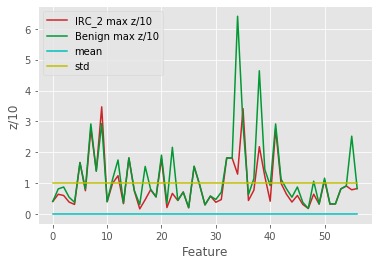

In [17]:
# There are outliers, upto 46 stdevs away from mean in several columns

plot_cols = data_cols
# plt.plot( np.log10( data[ plot_cols ].abs().max().values ) )
# plt.plot( data[ plot_cols ].abs().max().values / data[ plot_cols ].std().values / 10, label='max z/10' )
plt.plot( data.loc[ data.Label==1, plot_cols ].abs().max().values / data[ plot_cols ].std().values / 10, label='IRC_2 max z/10', color='#CC2529' )
# plt.plot( data.loc[ data.Label==2, plot_cols ].abs().max().values / data[ plot_cols ].std().values / 10, label='IRC_3 max z/10', color='#CC2550' )
# plt.plot( data.loc[ data.Label==3, plot_cols ].abs().max().values / data[ plot_cols ].std().values / 10, label='IRC_4 max z/10', color='#CC2580' )
# plt.plot( data.loc[ data.Label==4, plot_cols ].abs().max().values / data[ plot_cols ].std().values / 10, label='IRC_5 max z/10', color='#CC2590' )
# plt.plot( data.loc[ data.Label==5, plot_cols ].abs().max().values / data[ plot_cols ].std().values / 10, label='IRC_6 max z/10', color='#CC2510' )
# plt.plot( data.loc[ data.Label==6, plot_cols ].abs().max().values / data[ plot_cols ].std().values / 10, label='IRC_7 max z/10', color='#CC2429' )
# plt.plot( data.loc[ data.Label==7, plot_cols ].abs().max().values / data[ plot_cols ].std().values / 10, label='IRC_11 max z/10', color='#CC2450' )
# plt.plot( data.loc[ data.Label==8, plot_cols ].abs().max().values / data[ plot_cols ].std().values / 10, label='IRC_15 max z/10', color='#CC2580' )
# plt.plot( data.loc[ data.Label==9, plot_cols ].abs().max().values / data[ plot_cols ].std().values / 10, label='Neris max z/10', color='#CC2590' )
# plt.plot( data.loc[ data.Label==10, plot_cols ].abs().max().values / data[ plot_cols ].std().values / 10, label='RBot max z/10', color='#CC2510' )
# plt.plot( data.loc[ data.Label==11, plot_cols ].abs().max().values / data[ plot_cols ].std().values / 10, label='Virut max z/10', color='#CC2329' )
# plt.plot( data.loc[ data.Label==12, plot_cols ].abs().max().values / data[ plot_cols ].std().values / 10, label='Zeus_2 max z/10', color='#CC2229' )


plt.plot( data.loc[ data.Label==0, plot_cols ].abs().max().values / data[ plot_cols ].std().values / 10, label='Benign max z/10', color='#009933' )
plt.plot( data[ plot_cols ].mean().values, label='mean', color='c' )
# plt.plot( data[ plot_cols ].abs().mean().values, label='abs mean' )
plt.plot( data[ plot_cols ].std().values, label='std', color='y' )
plt.xlabel('Feature')
plt.ylabel('z/10')
plt.legend() ; 

plt.savefig('/home/rizwan/jupyter-figs/Comparison_of_GAN_outputs.eps', format='eps')


In [18]:
# # There are outliers, upto 46 stdevs away from mean in several columns

# plot_cols = data_cols
# # plt.plot( np.log10( data[ plot_cols ].abs().max().values ) )
# # plt.plot( data[ plot_cols ].abs().max().values / data[ plot_cols ].std().values / 10, label='max z/10' )
# plt.plot( data.loc[ data.Label==1, plot_cols ].abs().max().values / data[ plot_cols ].std().values / 10, label='Botnet max z/10', color='#CC2529' )
# plt.plot( data.loc[ data.Label==0, plot_cols ].abs().max().values / data[ plot_cols ].std().values / 10, label='Benign max z/10', color='#009933' )
# plt.plot( data[ plot_cols ].mean().values, label='mean', color='c' )
# # plt.plot( data[ plot_cols ].abs().mean().values, label='abs mean' )
# plt.plot( data[ plot_cols ].std().values, label='std', color='y' )
# plt.xlabel('Feature')
# plt.ylabel('z/10')
# plt.legend() ; 


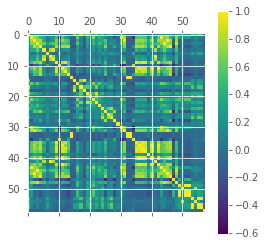

In [19]:
# Check Correlations
# Note no correlations among PCA transformed columns, as expected


# corr0 = data.corr()
# plt.colorbar()
# plt.imshow(corr0) ;




plt.matshow(data.corr())
# plt.xticks(range(len(data.columns)), data.columns)
# plt.yticks(range(len(data.columns)), data.columns)
plt.colorbar()
plt.show()


<a id="Fig3"><h1>Data Distributions by Feature and Class</h1></a><br>
<a href='#TOC'>Table of contents</a>

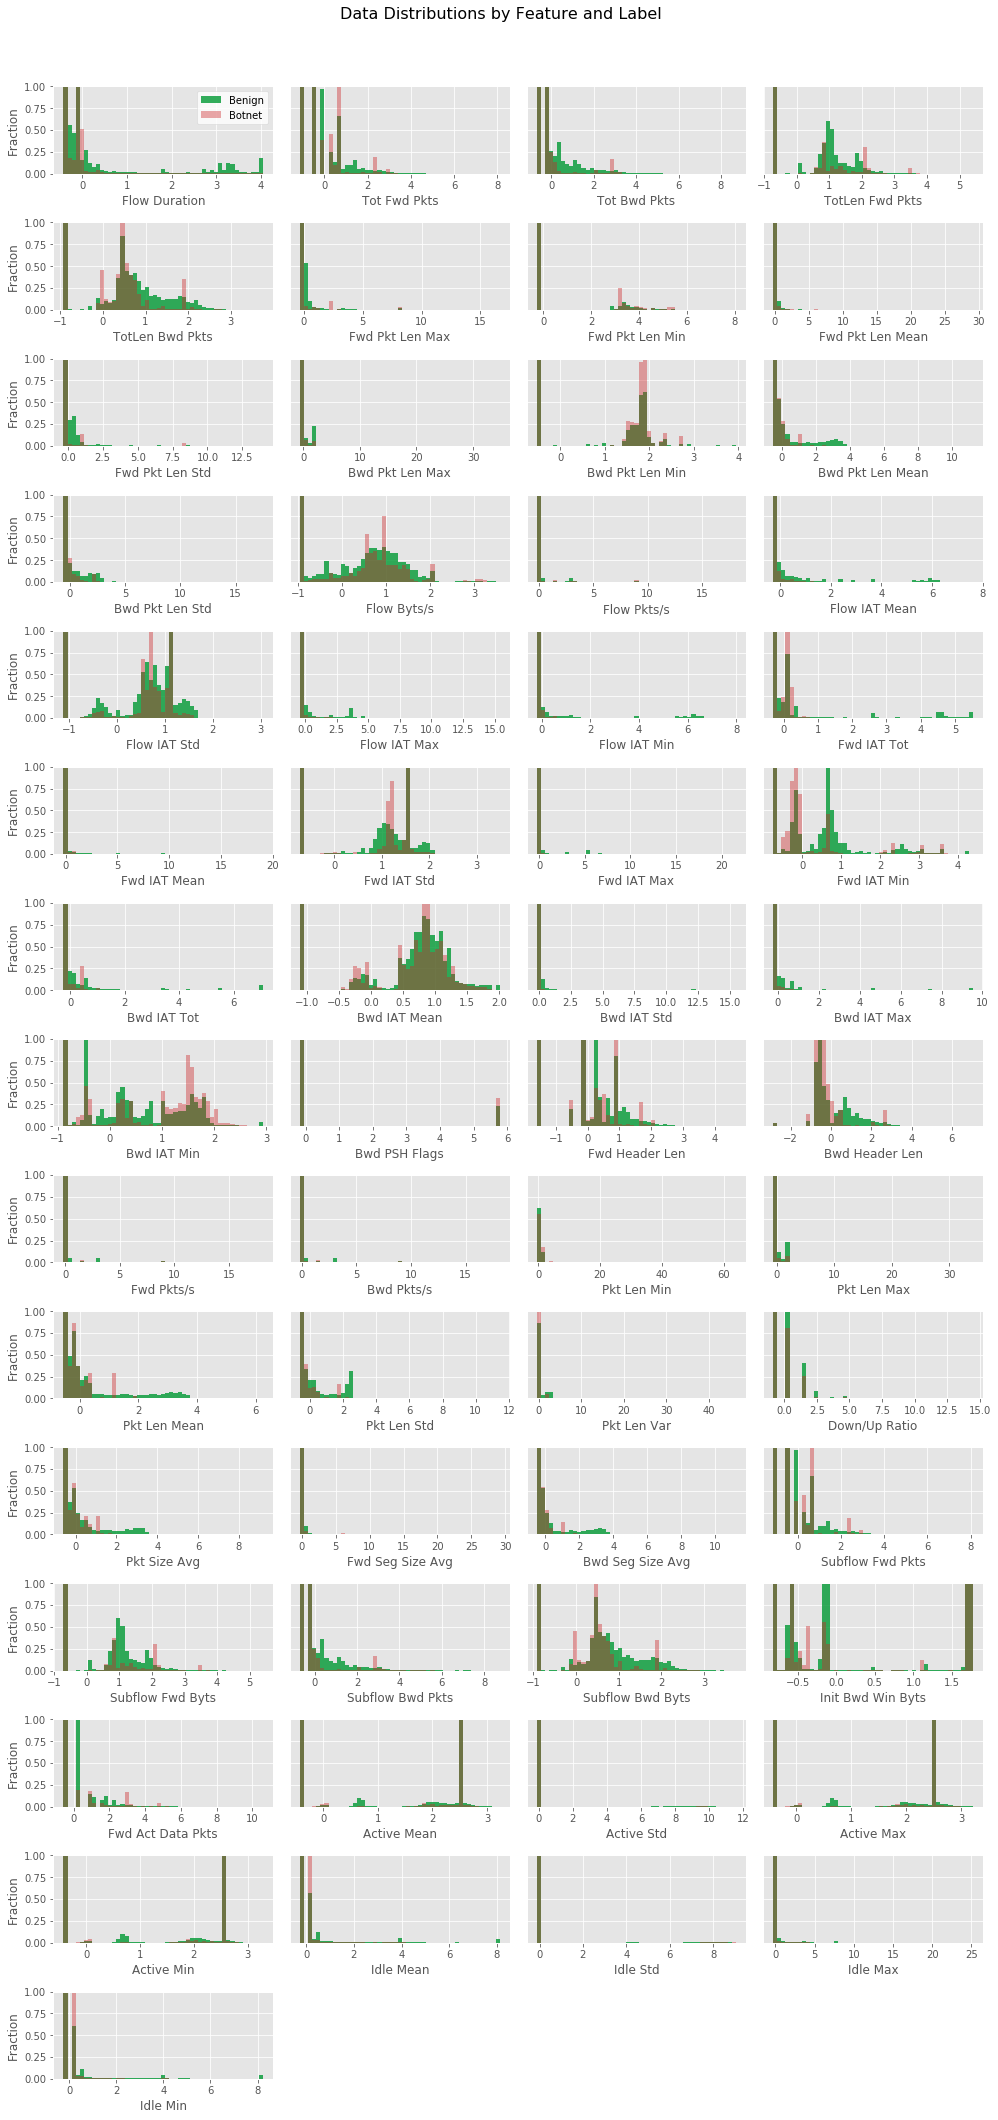

In [20]:

# Plot the data by each feature 


# print(np.percentile(df4[1], 50))


axarr = [[]]*len(data_cols)
columns = 4
rows = int( np.ceil( len(data_cols) / columns ) )
f, fig = plt.subplots( figsize=(columns*3.5, rows*2) )

f.suptitle('Data Distributions by Feature and Label', size=16)

for i, col in enumerate(data_cols[:]):
    axarr[i] = plt.subplot2grid( (int(rows), int(columns)), (int(i//columns), int(i%columns)) )
    
    
    axarr[i].hist( data.loc[ data.Label == 0, col ] , label=['Benign'], color=('#009933'), alpha=0.8,
                          bins=np.linspace( np.percentile(data[col],0), np.percentile(data[col],100),50 ),
                          density=True )
    
    axarr[i].hist( data.loc[ data.Label == 1, col ] , label=['Botnet'], color=['#CC2529'], alpha=0.4,
                          bins=np.linspace( np.percentile(data[col],0), np.percentile(data[col],100),50 ),
                          density=True )
    
    
    
    
    axarr[i].set_xlabel(col, size=12)
    axarr[i].set_ylim([0,1])
    axarr[i].tick_params(axis='both', labelsize=10)
    if i == 0: 
        legend = axarr[i].legend()
        legend.get_frame().set_facecolor('white')
    if i%4 != 0 : 
        axarr[i].tick_params(axis='y', left=False, labelleft=False)
    else:
        axarr[i].set_ylabel('Fraction',size=12)

plt.tight_layout(rect=[0,0,1,0.95]) # xmin, ymin, xmax, ymax
# plt.savefig('plots/Engineered_Data_Distributions.png')

plt.show()

In [21]:
%cd /home/rizwan/Insync/rhr407@gmail.com/Google Drive - Shared with me/PhD/Development/codes/code-in-prog
!ls

/home/rizwan/Insync/rhr407@gmail.com/Google Drive - Shared with me/PhD/Development/codes/code-in-prog
Data_set  project-folder


In [22]:
# Save engineered dataset for use in analysis
# Save as pickle for faster reload



pickle.dump(data, open('Data_set/' + 'botnet.engineered.pkl','wb'))


In [23]:

# # Save as csv for human readability - much slower save

# data.to_csv('Data_set/' + 'botnet.engineered.csv.zip')


<a id="xgboost botnet detection"><h1>xgboost botnet detection</h1></a>

<a href='#TOC'>Table of contents</a>
<br><br>

- Here we'll use the xgboost algorithm to detect botnet flows

In [24]:

# define the columns we want to test on, in case we want to use less than the full set

test_cols = data.columns

# test_cols = data.columns[ data.columns != 'Amount' ]

print(len(test_cols))
print(test_cols)

58
Index(['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
       'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s',
       'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Bwd PSH Flags',
       'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s',
       'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std',
       'Pkt Len Var', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg',
       'Bwd Seg Size Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts',
       'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Bwd Win Byts',
       'Fwd Act Data Pkts', 'Active Mean', 'Active Std', 'Active Max',
       'Active M

In [25]:

# Define some custom metric functions for use with the xgboost algorithm
# https://github.com/dmlc/xgboost/blob/master/demo/guide-python/custom_objective.py

from sklearn.metrics import recall_score, precision_score, roc_auc_score

def recall(preds, dtrain):
    labels = dtrain.get_label()
    return 'recall',  recall_score(labels, np.round(preds))

def precision(preds, dtrain):
    labels = dtrain.get_label()
    return 'precision',  precision_score(labels, np.round(preds))

def roc_auc(preds, dtrain):
    labels = dtrain.get_label()
    return 'roc_auc',  roc_auc_score(labels, preds)


In [26]:
# Set up the test and train sets

np.random.seed(0)

n_real = np.sum(data.Label==0) # 242476
n_test = np.sum(data.Label==1) # 113680


train_fraction = 0.7
fn_real = int(n_real * train_fraction)
fn_test = int(n_test * train_fraction)

real_samples = data.loc[ data.Label==0, test_cols].sample(n_real, replace=False).reset_index(drop=True)
test_samples = data.loc[ data.Label==1, test_cols].sample(n_test, replace=False).reset_index(drop=True)

train_df = pd.concat([real_samples[:fn_real],test_samples[:fn_test]],axis=0,ignore_index=True).reset_index(drop=True)
# train_df = pd.concat([real_samples[:fn_test],test_samples[:fn_test]],axis=0,ignore_index=True).reset_index(drop=True)

test_df = pd.concat([real_samples[fn_real:],test_samples[fn_test:]],axis=0,ignore_index=True).reset_index(drop=True)
print( 'Classes Benign, Botnet: ', n_real, n_test )
print( 'train, test: ', len(train_df), len(test_df) )

X_col = test_df.columns[:-1]
y_col = test_df.columns[-1]
dtrain = xgb.DMatrix(train_df[X_col], train_df[y_col], feature_names=X_col)
dtest = xgb.DMatrix(test_df[X_col], test_df[y_col], feature_names=X_col)


Classes Benign, Botnet:  310814 45342
train, test:  249308 106848


/home/rizwan/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/rizwan/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [27]:
%%time

# Run the xgboost algorithm, maximize recall on the test set

results_dict = {}

xgb_params = {
#     'max_depth': 4,
    'objective': 'binary:logistic',
    'random_state': 0,
    'eval_metric': 'auc', # auc, error
#     'tree_method': 'hist'
#     'grow_policy': 'lossguide' # depthwise, lossguide
}

xgb_test = xgb.train(xgb_params, dtrain, num_boost_round=100, 
                     verbose_eval=False,
                     early_stopping_rounds=20, 
                     evals=[(dtrain,'train'),(dtest,'test')],
                     evals_result = results_dict,              
                     feval = recall, maximize=True
#                      feval = roc_auc, maximize=True
                    )

y_pred = xgb_test.predict(dtest, ntree_limit=xgb_test.best_iteration+1)
y_true = test_df['Label'].values
print( 'best iteration: ', xgb_test.best_iteration )
print( recall( y_pred, dtest ) )
print( precision( y_pred, dtest ) )
print( roc_auc( y_pred, dtest ) )
# print( 'Accuracy: {:.3f}'.format(SimpleAccuracy(y_pred, y_true)) )
SimpleMetrics( np.round(y_pred), y_true)



best iteration:  90
('recall', 0.26310372711901786)
('precision', 0.9590032154340836)
('roc_auc', 0.8753778034858689)
Confusion Matrix


Pred 0  Pred 1
True 0   93092     153
True 1   10024    3579

Accuracy : 0.904752545672357
CPU times: user 5min 23s, sys: 8min 55s, total: 14min 19s
Wall time: 28.1 s


In [28]:
#  y_pred=np.round(y_pred)
# print(y_true)
# print(y_pred)

In [29]:
# from pycm import *
# cm = ConfusionMatrix(actual_vector= y_true, predict_vector=y_pred) 
# print(cm)

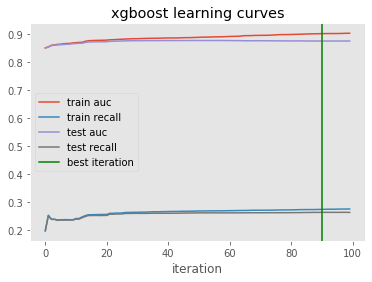

In [30]:

# Let's look at how the metrics changed on the train and test sets as more trees were added

for i in results_dict:
    for err in results_dict[i]:
        plt.plot(results_dict[i][err], label=i+' '+err)   
plt.axvline(xgb_test.best_iteration, c='green', label='best iteration')
plt.xlabel('iteration')
# plt.ylabel(err)
plt.title('xgboost learning curves')
plt.legend()
plt.grid() ;

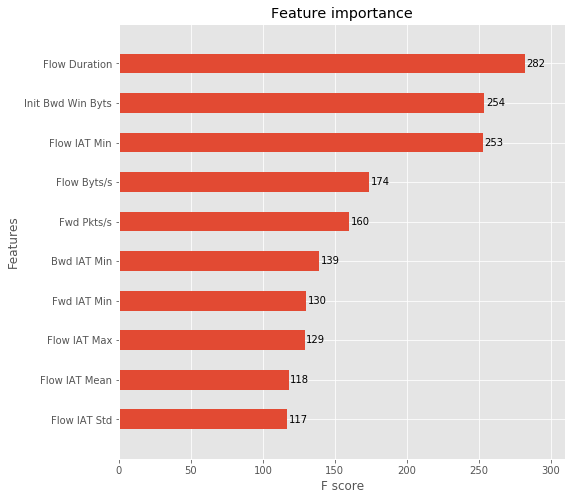

In [31]:
# Plot feature importances

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
xgb.plot_importance(xgb_test, max_num_features=10, height=0.5, ax=ax);

In [32]:

# Generate list of features sorted by importance in detecting botnet
# https://stackoverflow.com/questions/613183/sort-a-python-dictionary-by-value

import operator
x = xgb_test.get_fscore()
sorted_x = sorted(x.items(), key=operator.itemgetter(1), reverse=True)

# print( 'Top eight features for botnet detection: ', [ i[0] for i in sorted_x[:8] ] )

sorted_cols = [i[0] for i in sorted_x] + ['Label']
print( sorted_cols )
len(sorted_cols)

['Flow Duration', 'Init Bwd Win Byts', 'Flow IAT Min', 'Flow Byts/s', 'Fwd Pkts/s', 'Bwd IAT Min', 'Fwd IAT Min', 'Flow IAT Max', 'Flow IAT Mean', 'Flow IAT Std', 'Bwd Pkts/s', 'TotLen Bwd Pkts', 'Bwd Header Len', 'Bwd IAT Mean', 'Bwd IAT Tot', 'Pkt Len Std', 'Flow Pkts/s', 'Pkt Len Mean', 'Fwd IAT Mean', 'Active Mean', 'Fwd IAT Tot', 'Fwd IAT Std', 'TotLen Fwd Pkts', 'Fwd Pkt Len Std', 'Idle Mean', 'Bwd Pkt Len Mean', 'Fwd Header Len', 'Bwd IAT Std', 'Fwd IAT Max', 'Bwd Pkt Len Min', 'Bwd IAT Max', 'Fwd Pkt Len Mean', 'Pkt Size Avg', 'Pkt Len Min', 'Bwd Pkt Len Std', 'Fwd Pkt Len Max', 'Idle Min', 'Active Min', 'Fwd Pkt Len Min', 'Active Max', 'Bwd Pkt Len Max', 'Pkt Len Max', 'Idle Max', 'Fwd Act Data Pkts', 'Tot Fwd Pkts', 'Idle Std', 'Bwd PSH Flags', 'Down/Up Ratio', 'Active Std', 'Tot Bwd Pkts', 'Label']


51

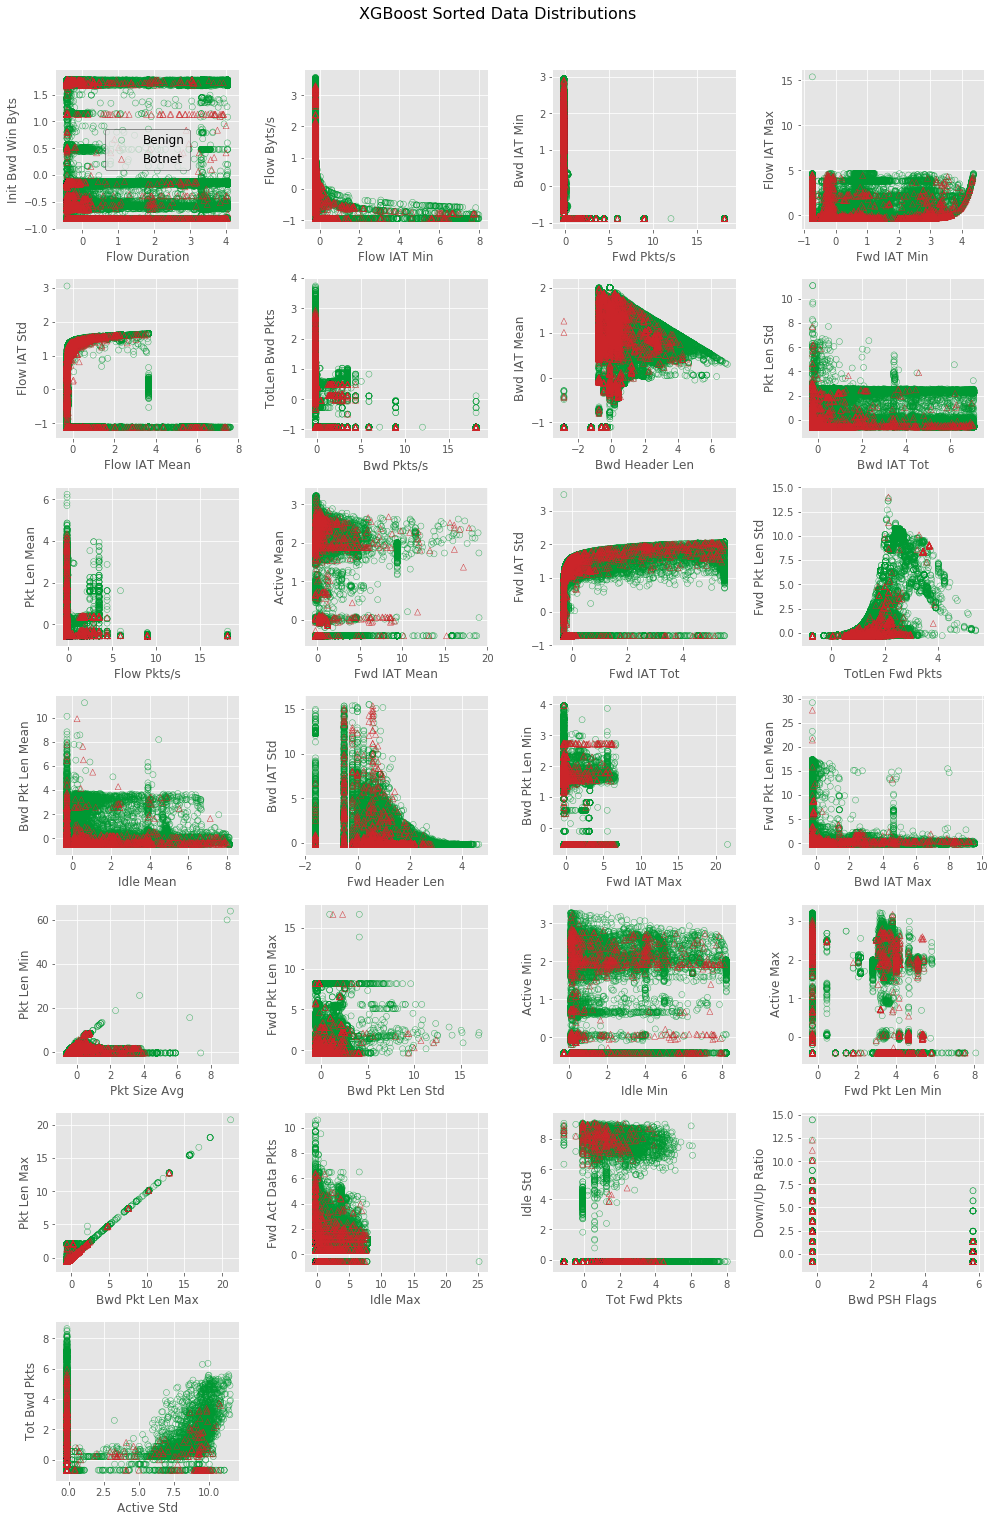

In [33]:

# Plot all of the training data with paired features sorted by importance
# This takes a while

# colors = ['#009933', '#CC2529']
colors = ['#009933', '#CC2529']

markers = ['o','^']
labels = ['Benign','Botnet']
# alphas = [0.7, 0.3]
alphas = [0.7, 0.9]

columns = 4
rows = int( np.ceil( len(data_cols) / columns / 2 ) )
plt.figure( figsize=(columns*3.5, rows*3) )
plt.suptitle('XGBoost Sorted Data Distributions ', size=16)

train = train_df.copy()

for i in range( int(np.floor(len(sorted_x)/2)) )[:]:
    col1, col2 = sorted_x[i*2][0], sorted_x[i*2+1][0]
#     print(i,col1,col2)
    
    plt.subplot(rows,columns,i+1)  
    for group, color, marker, label, alpha in zip( train.groupby('Label'), colors, markers, labels, alphas ):
        plt.scatter( group[1][col1], group[1][col2], 
                         label=label, marker=marker, alpha=alpha,
                         edgecolors=color, facecolors='none' )         
    plt.xlabel(col1, size=12)
    plt.ylabel(col2, size=12)
    plt.tick_params(axis='both', labelsize=10)
    if i == 0: plt.legend(fontsize=12, edgecolor='black')

plt.tight_layout(rect=[0,0,1,0.95]) # xmin, ymin, xmax, ymax
# plt.savefig('plots/XGB_Sorted_Data_Distributions.png')
plt.show()


In [34]:


# Lets look at the effect of the ratio of normal:botnet data in the dataset on recall and roc_auc
# We'll use cross validation to see if differences are significant

%time

np.random.seed(0)

n_real = np.sum(data.Label==0) # 242476
n_test = np.sum(data.Label==1) # 113680
real_samples = data.loc[ data.Label==0, test_cols].sample(n_real, replace=False).reset_index(drop=True)
test_samples = data.loc[ data.Label==1, test_cols].sample(n_test, replace=False).reset_index(drop=True)
X_col = data.columns[:-1]
y_col = data.columns[-1]

test_data=[]

# for i in [1]:
# for i in [0.1,0.5,1,2,10]:
for i in np.logspace(-1,2,8):
    print(i)
    train_df = pd.concat([real_samples[:int(n_test*i)],test_samples[:n_test]],axis=0,ignore_index=True).reset_index(drop=True)
    dtrain = xgb.DMatrix(train_df[X_col], train_df[y_col], feature_names=X_col)
    results = xgb.cv(xgb_params, dtrain, 
                     nfold=5, num_boost_round=100, early_stopping_rounds=10, seed=0,
                     feval=recall)
    test_data.append(list([i]) + list(results.tail(1).index) + list(results.tail(1).values[0]))
    
test_data = pd.DataFrame(test_data, columns=list(['ratio','best'])+list(results.columns))
test_data

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 8.11 µs
0.1


/home/rizwan/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/rizwan/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


0.2682695795279726
0.7196856730011519
1.9306977288832496
5.17947467923121
13.894954943731374
37.27593720314938
100.0


ratio  best  train-auc-mean  train-auc-std  train-recall-mean  \
0    0.100000     0        0.808156       0.012238           0.992849   
1    0.268270     1        0.848245       0.001338           0.987153   
2    0.719686     1        0.854331       0.001750           0.977756   
3    1.930698     4        0.862683       0.000870           0.582337   
4    5.179475     0        0.852135       0.000992           0.208649   
5   13.894955     0        0.851057       0.000885           0.228981   
6   37.275937     0        0.851057       0.000885           0.228981   
7  100.000000     0        0.851057       0.000885           0.228981   

   train-recall-std  test-auc-mean  test-auc-std  test-recall-mean  \
0          0.000234       0.802484      0.021928          0.991750   
1          0.000968       0.843202      0.004993          0.984937   
2          0.003312       0.850554      0.001441          0.975485   
3          0.007757       0.859690      0.002072          0.578106   
4          0.001325       0.850585      0.001837          0.207791   
5          0.019767       0.849411      0.001679          0.228312   
6          0.019767       0.849411      0.001679          0.228312   
7          0.019767       0.849411      0.001679          0.228312   

   test-recall-std  
0         0.000981  
1         0.001196  
2         0.003285  
3         0.005301  
4         0.002753  
5         0.019389  
6         0.019389  
7         0.019389

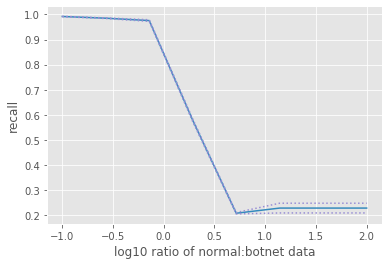

In [35]:

# Recall decreases as more normal data is added

# metric = 'auc'
metric = 'recall'
# xs = test_data['ratio'].values
xs = np.log10(test_data['ratio'].values)
ys = test_data['test-'+metric+'-mean'].values
stds = test_data['test-'+metric+'-std'].values
plt.plot(xs,ys,c='C1')
plt.plot(xs,ys+stds,linestyle=':',c='C2')
plt.plot(xs,ys-stds,linestyle=':',c='C2')
plt.xlabel('log10 ratio of normal:botnet data')
plt.ylabel(metric)
# plt.ylim([0.96,1.01])
plt.show()

In [36]:

# Put columns in order of importance for xgboost botnet detection (from that section)

sorted_cols = ['Init Bwd Win Byts', 'Flow Duration', 'Flow IAT Min', 'Fwd IAT Min', 'Bwd IAT Min', 'Bwd Header Len', 'Fwd Pkts/s', 'Flow IAT Max', 'Flow Byts/s', 'TotLen Fwd Pkts', 'Fwd Pkt Len Max', 'Fwd IAT Tot', 'Fwd Pkt Len Std', 'Bwd Pkt Len Std', 'Flow IAT Mean', 'Flow Pkts/s', 'Fwd Pkt Len Mean', 'TotLen Bwd Pkts', 'Down/Up Ratio', 'Pkt Len Std', 'Pkt Len Mean', 'Bwd IAT Tot', 'Bwd Pkts/s', 'Flow IAT Std', 'Fwd Act Data Pkts', 'Fwd Header Len', 'Bwd Pkt Len Max', 'Fwd IAT Std', 'Pkt Size Avg', 'Fwd IAT Max', 'Idle Mean', 'Bwd Pkt Len Mean', 'Bwd IAT Mean', 'Fwd Pkt Len Min', 'Pkt Len Max', 'Bwd IAT Std', 'Tot Fwd Pkts', 'Bwd IAT Max', 'Bwd Pkt Len Min', 'Fwd IAT Mean', 'Idle Max', 'Pkt Len Min', 'Active Min', 'Idle Min', 'Idle Std', 'Tot Bwd Pkts', 'Active Mean', 'Active Std', 'Bwd PSH Flags', 'Active Max', 'Label']

data = data[ sorted_cols ].copy()


print(data.shape)

riz_var = data.shape[1]

print(riz_var)

(356156, 51)
51


<a id="Classification"><h1>Classification</h1></a>

<a href='#TOC'>Table of contents</a>

In [37]:
!pip install joblib
!pip install hdbscan

In [38]:
# load clustering libraries

import sklearn.cluster as cluster

# hdbscan not in kaggle/python at present
import hdbscan

/home/rizwan/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/rizwan/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [39]:
# Set up training set to consist of only botnet data

train = data.loc[ data['Label']==1 ].copy()


print( pd.DataFrame( [ [np.sum(train['Label']==i)] for i in np.unique(train['Label']) ], columns=['count'], index=np.unique(train['Label']) ) )

# train = pd.get_dummies(train, columns=['Label'], prefix='Label')
label_cols = [ i for i in train.columns if 'Label' in i ]
data_cols = [ i for i in train.columns if i not in label_cols ]
train_no_label = train[ data_cols ]


     count
1.0  45342


In [40]:
# %%time

# # TSNE is an interesting method to map higher dimensional data into two dimensions
# # http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

# # Note TSNE map may not be what you might think:
# # https://distill.pub/2016/misread-tsne/

# # Create multiple projections to compare results from different random states

# from sklearn.manifold import TSNE

# projections = [ TSNE(random_state=i).fit_transform(train_no_label) for i in range(3) ]


In [41]:
# %%time 

# # Now we'll compare some different clustering algorithms
# # https://github.com/scikit-learn-contrib/hdbscan/blob/master/docs/comparing_clustering_algorithms.rst

# algorithms = [ 
# #     [ 'KMeans', cluster.KMeans, (), {'random_state':0} ],
#     [ 'KMeans', cluster.KMeans, (), {'n_clusters':2, 'random_state':0} ],
# #     [ 'KMeans 3', cluster.KMeans, (), {'n_clusters':3, 'random_state':0} ],
# #     [ 'Agglomerative', cluster.AgglomerativeClustering, (), {} ],
#     [ 'Agglomerative', cluster.AgglomerativeClustering, (), {'linkage': 'ward', 'n_clusters': 3} ],
# #     [ 'Agg. Ave 3', cluster.AgglomerativeClustering, (), {'linkage': 'average', 'n_clusters': 3} ],
# #     [ 'Agg. Complete 3', cluster.AgglomerativeClustering, (), {'linkage': 'complete', 'n_clusters': 3} ],
# #     [ 'DBSCAN', cluster.DBSCAN, (), {'eps':0.025} ],
# #     [ 'HDBSCAN', hdbscan.HDBSCAN, (), {} ],
#     [ 'HDBSCAN', hdbscan.HDBSCAN, (), {'min_cluster_size':10, 'min_samples':1, } ],
# #     [ 'HDBSCAN 2 10', hdbscan.HDBSCAN, (), {'min_cluster_size':2, 'min_samples':10, } ],
# #     [ 'HDBSCAN 10 10 ', hdbscan.HDBSCAN, (), {'min_cluster_size':10, 'min_samples':10, } ],
# ]

# rows = len(algorithms)
# columns = 4
# plt.figure(figsize=(columns*3, rows*3))

# for i, [name, algorithm, args, kwds] in enumerate(algorithms):
#     print(i, name)

#     labels = algorithm(*args, **kwds).fit_predict(train_no_label)
# #     labels = algorithm(*args, **kwds).fit_predict(projections[0])
    
# #     print( pd.DataFrame( [ [np.sum(labels==i)] for i in np.unique(labels) ], columns=['count'], index=np.unique(labels) ) )
    
#     colors = np.clip(labels,-1,9)
#     colors = [ 'C'+str(i) if i>-1 else 'black' for i in colors ]
    
#     plt.subplot(rows,columns,i*columns+1)
#     plt.scatter(train_no_label[data_cols[0]], train_no_label[data_cols[1]], c=colors)
#     plt.xlabel(data_cols[0]), plt.ylabel(data_cols[1])
#     plt.title(name)

#     for j in range(3):
#         plt.subplot(rows,columns,i*columns+1+j+1)
#         plt.scatter(*(projections[j].T), c=colors) 
#         plt.xlabel('x'), plt.ylabel('y')
#         plt.title('TSNE projection '+str(j+1),size=12)
        
# #     break

# plt.suptitle('Comparison of Fraud Clusters', size=16)
# plt.tight_layout(rect=[0,0,1,0.95])
# plt.savefig('plots/Fraud_Cluster_Diagram.png')
# plt.show()

0 KMeans


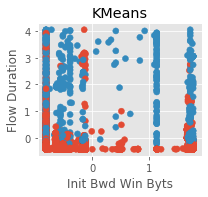

In [42]:

# %%time 

# Now we'll compare some different clustering algorithms
# https://github.com/scikit-learn-contrib/hdbscan/blob/master/docs/comparing_clustering_algorithms.rst

algorithms = [ 
#     [ 'KMeans', cluster.KMeans, (), {'random_state':0} ],
    [ 'KMeans', cluster.KMeans, (), {'n_clusters':2, 'random_state':0} ],
#     [ 'KMeans 3', cluster.KMeans, (), {'n_clusters':3, 'random_state':0} ],
#     [ 'Agglomerative', cluster.AgglomerativeClustering, (), {} ],
#     [ 'Agglomerative', cluster.AgglomerativeClustering, (), {'linkage': 'ward', 'n_clusters': 3} ],
#     [ 'Agg. Ave 3', cluster.AgglomerativeClustering, (), {'linkage': 'average', 'n_clusters': 3} ],
#     [ 'Agg. Complete 3', cluster.AgglomerativeClustering, (), {'linkage': 'complete', 'n_clusters': 3} ],
#     [ 'DBSCAN', cluster.DBSCAN, (), {'eps':0.025} ],
#     [ 'HDBSCAN', hdbscan.HDBSCAN, (), {} ],
#     [ 'HDBSCAN', hdbscan.HDBSCAN, (), {'min_cluster_size':10, 'min_samples':1, } ],
#     [ 'HDBSCAN 2 10', hdbscan.HDBSCAN, (), {'min_cluster_size':2, 'min_samples':10, } ],
#     [ 'HDBSCAN 10 10 ', hdbscan.HDBSCAN, (), {'min_cluster_size':10, 'min_samples':10, } ],
]

rows = len(algorithms)
columns = 1
plt.figure(figsize=(columns*3, rows*3))

for i, [name, algorithm, args, kwds] in enumerate(algorithms):
    print(i, name)

    labels = algorithm(*args, **kwds).fit_predict(train_no_label)
#     labels = algorithm(*args, **kwds).fit_predict(projections[0])
    
#     print( pd.DataFrame( [ [np.sum(labels==i)] for i in np.unique(labels) ], columns=['count'], index=np.unique(labels) ) )
    
    colors = np.clip(labels,-1,9)
    colors = [ 'C'+str(i) if i>-1 else 'black' for i in colors ]
    
    plt.subplot(rows,columns,i*columns+1)
    plt.scatter(train_no_label[data_cols[0]], train_no_label[data_cols[1]], c=colors)
    plt.xlabel(data_cols[0]), plt.ylabel(data_cols[1])
    plt.title(name)

#     for j in range(3):
#         plt.subplot(rows,columns,i*columns+1+j+1)
#         plt.scatter(*(projections[j].T), c=colors) 
#         plt.xlabel('x'), plt.ylabel('y')
#         plt.title('TSNE projection '+str(j+1),size=12)
        
#     break

# plt.suptitle('Comparison of botnet Clusters', size=16)
plt.tight_layout(rect=[0,0,1,0.95])
# plt.savefig('botnet_Cluster_Diagram.png')
plt.show()

In [43]:
# Now pick a set of labels and add to the dataset

algorithm = cluster.KMeans
args, kwds = (), {'n_clusters':2, 'random_state':0}
labels = algorithm(*args, **kwds).fit_predict(train_no_label)
# labels = algorithm(*args, **kwds).fit_predict(projections[0])

print( pd.DataFrame( [ [np.sum(labels==i)] for i in np.unique(labels) ], columns=['count'], index=np.unique(labels) ) )

botnet_w_classes = train.copy()
botnet_w_classes['Label'] = labels

botnet_w_classes['Label']

   count
0  35454
1   9888


8157      1
8159      1
8161      1
8162      0
8163      0
8164      0
8165      0
8166      0
8167      0
8168      0
8169      0
8170      0
8171      0
8172      0
8173      0
8174      0
8175      0
8176      0
8177      0
8178      0
8179      0
8180      0
8181      0
8182      0
8183      0
8184      0
8185      0
8186      0
8187      0
8188      0
         ..
356022    1
356033    1
356044    0
356047    0
356049    1
356055    0
356059    0
356064    0
356066    0
356067    1
356069    0
356073    0
356081    0
356082    1
356085    0
356087    0
356089    0
356091    0
356092    1
356094    0
356096    0
356098    0
356099    1
356102    0
356111    0
356114    0
356118    0
356123    0
356124    1
356149    0
Name: Label, Length: 45342, dtype: int32

In [44]:
# Let's see which features are most useful for detecting differences between the classes:

dtrain = xgb.DMatrix(botnet_w_classes[data_cols], botnet_w_classes['Label'], feature_names=data_cols)

xgb_params = {
    'objective': 'binary:logistic',
    'random_state': 0,
    'eval_metric': 'auc', # allows for balanced or unbalanced classes 
    }
xgb_test = xgb.train(xgb_params, dtrain, num_boost_round=10) # limit to ten rounds for fast evaluation

import operator
x = xgb_test.get_fscore()
sorted_x = sorted(x.items(), key=operator.itemgetter(1), reverse=True)
print( 'Top eight features: ', [ [i[0],i[1]] for i in sorted_x[:8] ] )


/home/rizwan/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/rizwan/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Top eight features:  [['Flow Duration', 31], ['Flow Byts/s', 20], ['Init Bwd Win Byts', 20], ['Active Min', 16], ['Fwd IAT Max', 10], ['Active Max', 9], ['Fwd IAT Tot', 9], ['Flow IAT Std', 8]]


In [45]:

# Add KMeans generated classes to botnet data

import sklearn.cluster as cluster

print(data.shape) # verify if data has 51 column after xgboost

train = data.loc[ data['Label']==1 ].copy()

algorithm = cluster.KMeans
args, kwds = (), {'n_clusters':2, 'random_state':0}
labels = algorithm(*args, **kwds).fit_predict(train[ data_cols ])

print( pd.DataFrame( [ [np.sum(labels==i)] for i in np.unique(labels) ], columns=['count'], index=np.unique(labels) ) )

botnet_w_classes = train.copy()
botnet_w_classes['Label'] = labels

botnet_w_classes

(356156, 51)
   count
0  35454
1   9888


Init Bwd Win Byts  Flow Duration  Flow IAT Min  Fwd IAT Min  \
8157             1.675993       2.084256     -0.206261     2.104821   
8159             1.720467       3.926261     -0.206261     2.104066   
8161             1.714666       3.293490     -0.206261     2.103328   
8162            -0.584132      -0.413701     -0.206261    -0.136817   
8163            -0.584132      -0.413982     -0.206261    -0.136817   
8164            -0.584132      -0.414205     -0.206261    -0.136817   
8165            -0.584132      -0.413612     -0.206261    -0.298565   
8166            -0.584132      -0.414120     -0.206261     0.096345   
8167            -0.584132      -0.413735     -0.206261    -0.107823   
8168            -0.584132      -0.414191     -0.206261     0.842425   
8169            -0.584132      -0.413957     -0.206261     0.788748   
8170            -0.584132      -0.413991     -0.206261     0.786623   
8171            -0.584132      -0.413808     -0.206261     0.785554   
8172             1.720467      -0.423052     -0.204075    -0.741455   
8173             1.720467      -0.423053     -0.204077    -0.741455   
8174            -0.584132      -0.414057     -0.206261     0.811100   
8175            -0.584132      -0.413578     -0.205962    -0.741455   
8176            -0.584132      -0.414269     -0.206261     0.787688   
8177            -0.584132      -0.413856     -0.205930    -0.741455   
8178            -0.584132      -0.414067     -0.206261     0.783405   
8179            -0.584132      -0.414036     -0.205939    -0.741455   
8180            -0.584132      -0.414124     -0.206261     0.782323   
8181            -0.584132      -0.413723     -0.206110    -0.741455   
8182            -0.584132      -0.413976     -0.206261     0.785554   
8183            -0.584132      -0.413961     -0.205906    -0.741455   
8184            -0.584132      -0.413918     -0.206261     0.825361   
8185            -0.584132      -0.413615     -0.206012    -0.741455   
8186            -0.584132      -0.413263     -0.206244     0.792949   
8187            -0.584132      -0.424083     -0.205967    -0.741455   
8188            -0.584132      -0.410022     -0.206244     0.788748   
...                   ...            ...           ...          ...   
356022          -0.168042      -0.090780     -0.005836     3.554265   
356033          -0.634999       1.895215     -0.206261     0.686024   
356044          -0.814592      -0.424234     -0.206259     0.273661   
356047          -0.814592      -0.413912     -0.205153    -0.741455   
356049          -0.168042      -0.089404     -0.003292     3.554253   
356055          -0.151270      -0.424236     -0.206248    -0.741455   
356059          -0.814592      -0.424243     -0.206261    -0.741455   
356064          -0.814592      -0.423874     -0.205583    -0.741455   
356066          -0.814592      -0.419779     -0.198071    -0.741455   
356067           1.720467      -0.088601     -0.206261    -0.205974   
356069          -0.142036       3.185182      6.415188    -0.741455   
356073          -0.137932      -0.424236     -0.206247    -0.741455   
356081           1.716284      -0.370418     -0.206244     0.903831   
356082           1.720467      -0.088513     -0.206261    -0.169229   
356085          -0.814592      -0.417144     -0.201443    -0.741455   
356087          -0.814592      -0.424225     -0.206227    -0.741455   
356089          -0.814592      -0.423670     -0.205209    -0.741455   
356091          -0.812777      -0.424237     -0.206250    -0.741455   
356092           1.720467      -0.088509     -0.206261    -0.057652   
356094          -0.814592      -0.419579     -0.197705    -0.741455   
356096          -0.814592      -0.423634     -0.205143    -0.741455   
356098          -0.814592      -0.419556     -0.206260    -0.741455   
356099           1.720467      -0.088612     -0.206261    -0.205974   
356102          -0.814592      -0.417615     -0.194102    -0.741455   
356111          -0.814592      -

<a id="GAN setup"><h1>GAN setup and training</h1></a>

<a href='#TOC'>Table of contents</a>


Resources:

https://github.com/wayaai/GAN-Sandbox
<br>
http://blog.richardweiss.org/2017/07/21/conditional-wasserstein-gan.html



Conversion of Waya.ai GAN and WGAN
- Remove convolutional layers
- Remove ResNeXt
- Add simple dense networks
- Convert WGAN back to simple GAN
- Use common functions as much as possible



For these functions I've passed the arguments as lists because it was easy to implement.

Standard solutions (because they are more stable) include using keyword dictionaries or objects, but those create a larger code base.


In [46]:
%cd /home/rizwan/Insync/rhr407@gmail.com/Google Drive - Shared with me/PhD/Development/codes/code-in-prog/project-folder/GANs_for_Credit_Card_Data

!ls

/home/rizwan/Insync/rhr407@gmail.com/Google Drive - Shared with me/PhD/Development/codes/code-in-prog/project-folder/GANs_for_Credit_Card_Data
GAN_171103.py  GAN_171103.pyc  GAN_comparisons.ipynb  __pycache__  readme.md


In [47]:
# train = data.loc[ data['Label']==1 ].copy()


In [48]:


# reloading the libraries and setting the parameters


import GAN_171103
import importlib
importlib.reload(GAN_171103) # For reloading after making changes
from GAN_171103 import *

# rand_dim = len(data_cols) + 1 #51 # 32 # needs to be ~data_dim
rand_dim = riz_var

print(rand_dim)

base_n_count = 128#################### 64 #128

nb_steps =5000 + 1 # 50000 # Add one for logging of the last interval
batch_size = 128 #64 # 128

k_d = 1  # number of critic network updates per adversarial training step
k_g = 1  # number of generator network updates per adversarial training step
critic_pre_train_steps = 100 # 100  # number of steps to pre-train the critic before starting adversarial training
log_interval = 100 # 100  # interval (in steps) at which to log loss summaries and save plots of image samples to disc
learning_rate = 5e-6 # 5e-5
data_dir = '/home/rizwan/jupyter-cache-0002/'
generator_model_path, discriminator_model_path, loss_pickle_path = None, None, None

# show = False
show = True 

# train = create_toy_spiral_df(1000)
# train = create_toy_df(n=1000,n_dim=2,n_classes=4,seed=0)
train = botnet_w_classes.copy().reset_index(drop=True) # botnet only with labels from classification
# train = data # only the botnet data with IP labelling from ISCX botnet dataset
# train = pd.get_dummies(train, columns=['Label'], prefix='Label', drop_first=True)
label_cols = [ i for i in train.columns if 'Label' in i ]
data_cols = [ i for i in train.columns if i not in label_cols ]


train[ data_cols ] = train[ data_cols ] /10 # scale to random noise size, one less thing to learn
train_no_label = train[ data_cols ]
# train_no_label


51


In [49]:
#  pip install git+https://github.com/keras-team/keras.git


data_dim:  50
data_cols:  ['Init Bwd Win Byts', 'Flow Duration', 'Flow IAT Min', 'Fwd IAT Min', 'Bwd IAT Min', 'Bwd Header Len', 'Fwd Pkts/s', 'Flow IAT Max', 'Flow Byts/s', 'TotLen Fwd Pkts', 'Fwd Pkt Len Max', 'Fwd IAT Tot', 'Fwd Pkt Len Std', 'Bwd Pkt Len Std', 'Flow IAT Mean', 'Flow Pkts/s', 'Fwd Pkt Len Mean', 'TotLen Bwd Pkts', 'Down/Up Ratio', 'Pkt Len Std', 'Pkt Len Mean', 'Bwd IAT Tot', 'Bwd Pkts/s', 'Flow IAT Std', 'Fwd Act Data Pkts', 'Fwd Header Len', 'Bwd Pkt Len Max', 'Fwd IAT Std', 'Pkt Size Avg', 'Fwd IAT Max', 'Idle Mean', 'Bwd Pkt Len Mean', 'Bwd IAT Mean', 'Fwd Pkt Len Min', 'Pkt Len Max', 'Bwd IAT Std', 'Tot Fwd Pkts', 'Bwd IAT Max', 'Bwd Pkt Len Min', 'Fwd IAT Mean', 'Idle Max', 'Pkt Len Min', 'Active Min', 'Idle Min', 'Idle Std', 'Tot Bwd Pkts', 'Active Mean', 'Active Std', 'Bwd PSH Flags', 'Active Max']





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "generator"
____________________________________________

/home/rizwan/anaconda3/lib/python3.7/site-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Step: 0 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.6663, 0.7661, 0.6847, 1.0000
D Real - D Gen: -0.0814


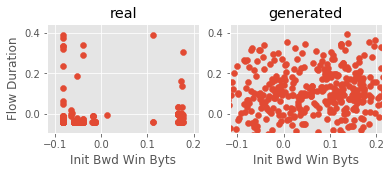

Step: 100 of 5001.
Losses: G, D Gen, D Real, Xgb: 1.1511, 0.4613, 0.7347, 0.9980
D Real - D Gen: 0.2735


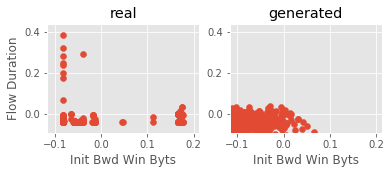

Step: 200 of 5001.
Losses: G, D Gen, D Real, Xgb: 1.4180, 0.3771, 0.4888, 0.9878
D Real - D Gen: 0.1117


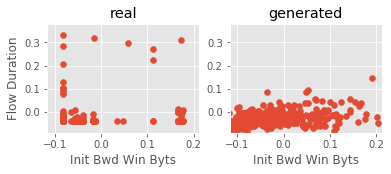

Step: 300 of 5001.
Losses: G, D Gen, D Real, Xgb: 1.4140, 0.4422, 0.5380, 0.9980
D Real - D Gen: 0.0957


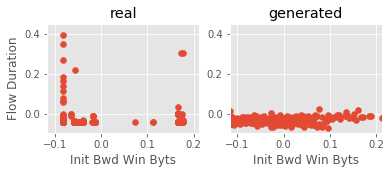

Step: 400 of 5001.
Losses: G, D Gen, D Real, Xgb: 1.4068, 0.5074, 0.5071, 0.9980
D Real - D Gen: -0.0003


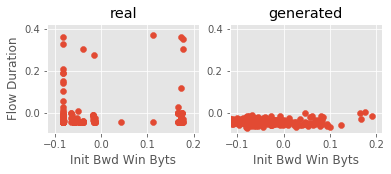

Step: 500 of 5001.
Losses: G, D Gen, D Real, Xgb: 1.4779, 0.4446, 0.5586, 0.9919
D Real - D Gen: 0.1141


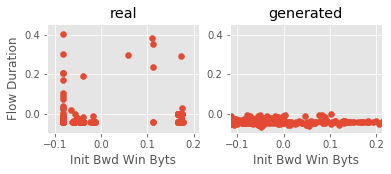

Step: 600 of 5001.
Losses: G, D Gen, D Real, Xgb: 1.3086, 0.5065, 0.5515, 0.9980
D Real - D Gen: 0.0450


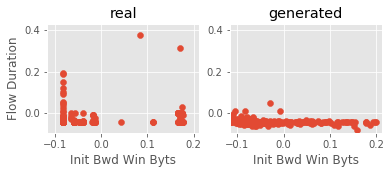

Step: 700 of 5001.
Losses: G, D Gen, D Real, Xgb: 1.4032, 0.4779, 0.4937, 0.9878
D Real - D Gen: 0.0157


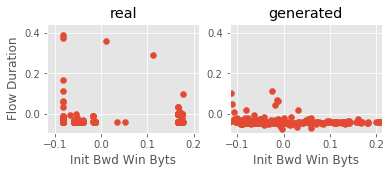

Step: 800 of 5001.
Losses: G, D Gen, D Real, Xgb: 1.4141, 0.4317, 0.5721, 1.0000
D Real - D Gen: 0.1404


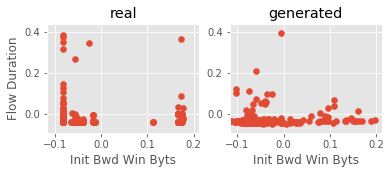

Step: 900 of 5001.
Losses: G, D Gen, D Real, Xgb: 1.3825, 0.4746, 0.5233, 1.0000
D Real - D Gen: 0.0487


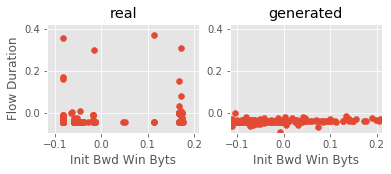

Step: 1000 of 5001.
Losses: G, D Gen, D Real, Xgb: 1.5891, 0.4005, 0.4829, 0.9939
D Real - D Gen: 0.0824


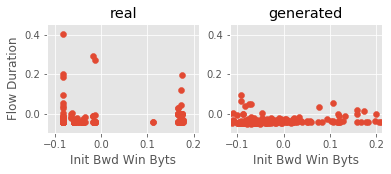

Step: 1100 of 5001.
Losses: G, D Gen, D Real, Xgb: 1.4106, 0.4105, 0.5544, 0.9919
D Real - D Gen: 0.1438


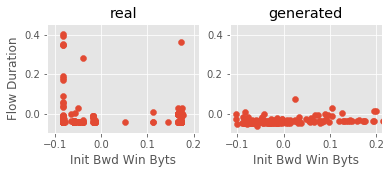

Step: 1200 of 5001.
Losses: G, D Gen, D Real, Xgb: 1.5350, 0.3764, 0.5451, 1.0000
D Real - D Gen: 0.1687


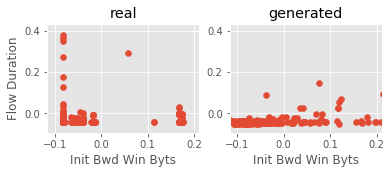

Step: 1300 of 5001.
Losses: G, D Gen, D Real, Xgb: 1.5163, 0.3903, 0.5311, 0.9797
D Real - D Gen: 0.1408


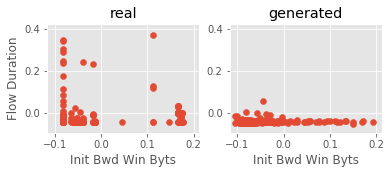

Step: 1400 of 5001.
Losses: G, D Gen, D Real, Xgb: 1.4935, 0.3738, 0.5695, 0.9858
D Real - D Gen: 0.1957


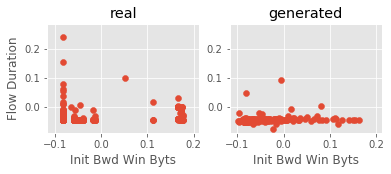

Step: 1500 of 5001.
Losses: G, D Gen, D Real, Xgb: 1.6126, 0.3270, 0.5381, 0.9959
D Real - D Gen: 0.2111


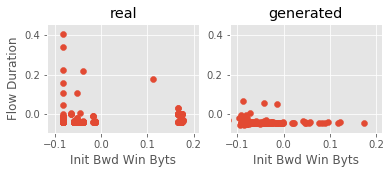

Step: 1600 of 5001.
Losses: G, D Gen, D Real, Xgb: 1.6714, 0.2964, 0.4552, 0.9959
D Real - D Gen: 0.1588


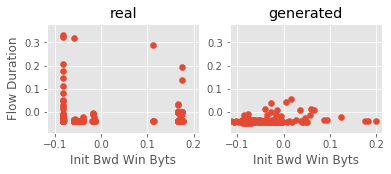

Step: 1700 of 5001.
Losses: G, D Gen, D Real, Xgb: 1.6046, 0.3824, 0.3830, 0.9980
D Real - D Gen: 0.0006


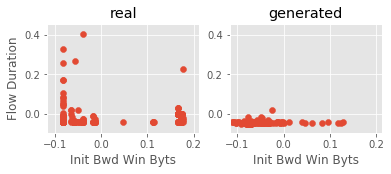

Step: 1800 of 5001.
Losses: G, D Gen, D Real, Xgb: 1.5911, 0.3183, 0.4970, 0.9939
D Real - D Gen: 0.1786


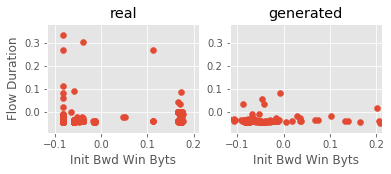

Step: 1900 of 5001.
Losses: G, D Gen, D Real, Xgb: 1.4499, 0.3763, 0.3382, 0.9959
D Real - D Gen: -0.0381


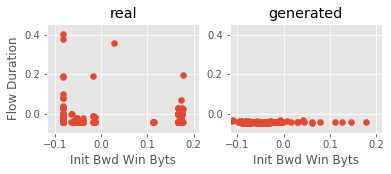

Step: 2000 of 5001.
Losses: G, D Gen, D Real, Xgb: 1.4648, 0.3848, 0.5833, 0.9939
D Real - D Gen: 0.1985


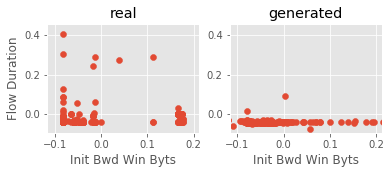

Step: 2100 of 5001.
Losses: G, D Gen, D Real, Xgb: 1.5061, 0.3951, 0.4801, 1.0000
D Real - D Gen: 0.0851


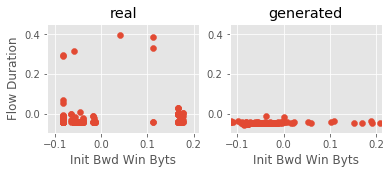

In [ ]:
%%time

# Training the vanilla GAN and CGAN architectures

k_d = 1  # number of critic network updates per adversarial training step
learning_rate = 5e-4 # 5e-5
arguments = [rand_dim, nb_steps, batch_size, 
             k_d, k_g, critic_pre_train_steps, log_interval, learning_rate, base_n_count,
            data_dir, generator_model_path, discriminator_model_path, loss_pickle_path, show ]

adversarial_training_GAN(arguments, train_no_label, data_cols ) # GAN
adversarial_training_GAN(arguments, train, data_cols=data_cols, label_cols=label_cols ) # CGAN

In [ ]:
%%time

# Training the WGAN and WCGAN architectures

k_d = 5 # train critic to optimal state each time
learning_rate = 1e-4 # 5e-5
arguments = [rand_dim, nb_steps, batch_size, 
             k_d, k_g, critic_pre_train_steps, log_interval, learning_rate, base_n_count,
            data_dir, generator_model_path, discriminator_model_path, loss_pickle_path, show ]

adversarial_training_WGAN(arguments, train_no_label, data_cols=data_cols ) # WGAN
adversarial_training_WGAN(arguments, train, data_cols=data_cols, label_cols=label_cols ) # WCGAN

In [ ]:
# %%time

# # for continued training

# import GAN_171103
# import importlib
# importlib.reload(GAN_171103) # For reloading after making changes
# from GAN_171103 import *

# last_step = 5000
# prefix = 'WGAN'
# # data_dir = '/home/rizwan/jupyter-cache-0002/'
# data_dir = '/home/rizwan/jupyter-cache-0002/'

# # Choose your learning rate
# # learning_rate = 1e-5 # first 10k
# # learning_rate = 1e-5 # 10-15k
# # learning_rate = 1e-6 # 15-20k

# generator_model_path = data_dir + prefix + '_generator_model_weights_step_' + str(last_step) + '.h5'
# discriminator_model_path = data_dir + prefix + '_discriminator_model_weights_step_' + str(last_step) + '.h5'
# loss_pickle_path = data_dir + prefix + '_losses_step_' + str(last_step) + '.pkl'

# nb_steps = 4000

# arguments = [rand_dim, nb_steps, batch_size, 
#              k_d, k_g, critic_pre_train_steps, log_interval, learning_rate, base_n_count,
#             data_dir, generator_model_path, discriminator_model_path, loss_pickle_path, show ]

# # Choose your training algorithm
# adversarial_training_GAN(arguments, train_no_label, data_cols=data_cols, starting_step=last_step+1 ) # GAN
# adversarial_training_GAN(arguments, train, data_cols=data_cols, label_cols=label_cols, starting_step=last_step+1 ) # CGAN
# adversarial_training_WGAN(arguments, train_no_label, data_cols=data_cols, starting_step=last_step+1 ) # WGAN
# adversarial_training_WGAN(arguments, train, data_cols=data_cols, label_cols=label_cols, starting_step=last_step+1 ) # WCGAN

In [ ]:

# For reloading loss data from pickles

prefix = 'WCGAN'
step = 5000

[combined_loss, disc_loss_generated, disc_loss_real, xgb_losses] = pickle.load(
    open(data_dir+prefix+'_losses_step_'+str(step)+'.pkl','rb'))


In [ ]:
# plt.plot( xgb_losses[:] ) ;
w = 10
plt.plot( pd.DataFrame(xgb_losses[:]).rolling(w).mean() ) ;

In [ ]:

# Look for the step with the lowest xgboost accuracy, and the lowest step saved (every 100)

best_step = list(xgb_losses).index( xgb_losses.min() ) * 10
print( best_step, xgb_losses.min() )

xgb100 = [ xgb_losses[i] for i in range(0, len(xgb_losses), 10) ]
best_step = xgb100.index( min(xgb100) ) * log_interval
print( best_step, min(xgb100) )

In [ ]:

# Look for the step with the lowest critic loss, and the lowest step saved (every 100)

delta_losses = np.array(disc_loss_real) - np.array(disc_loss_generated)

best_step = list(delta_losses).index( delta_losses.min() )
print( best_step, delta_losses.min() )

delta100 = [ delta_losses[i] for i in range(0, len(delta_losses), 100) ]
best_step = delta100.index( min(delta100) ) * log_interval
print( best_step, min(delta100) )

In [ ]:
# plt.plot( (np.array(disc_loss_real) - np.array(disc_loss_generated)) )

w = 50
# plt.plot( list(range(0,5001,1)), pd.rolling_mean((np.array(disc_loss_real) - np.array(disc_loss_generated)),w) )
plt.plot( pd.DataFrame(disc_loss_real[:]).rolling(w).mean() - pd.DataFrame(disc_loss_generated[:]).rolling(w).mean() ) ;

# plt.xlim([9000,10000])
# plt.ylim([0.03,0.05])

In [ ]:
# Let's look at some of the generated data
# First create the networks locally and load the weights

import GAN_171103
import importlib
importlib.reload(GAN_171103) # For reloading after making changes
from GAN_171103 import *

seed = 17

train = botnet_w_classes.copy().reset_index(drop=True) # botnet only with labels from classification
# train = data.loc[ data['Label']==1 ].copy()

# train = pd.get_dummies(train, columns=['Label'], prefix='Label', drop_first=True)
label_cols = [ i for i in train.columns if 'Label' in i ]
data_cols = [ i for i in train.columns if i not in label_cols ]
train[ data_cols ] = train[ data_cols ] / 10 # scale to random noise size, one less thing to learn
train_no_label = train[ data_cols ]

data_dim = len(data_cols)
label_dim = len(label_cols)
with_class = False
if label_dim > 0: with_class = True
np.random.seed(seed)

# define network models

# generator_model, discriminator_model, combined_model = define_models_CGAN(rand_dim, data_dim, label_dim, base_n_count, type='Wasserstein')
# generator_model.load_weights('/home/rizwan/jupyter-cache-0002/WCGAN_generator_model_weights_step_2100.h5')
generator_model, discriminator_model, combined_model = define_models_CGAN(rand_dim, data_dim, label_dim, base_n_count)
generator_model.load_weights('/home/rizwan/jupyter-cache-0002/CGAN_generator_model_weights_step_5000.h5')


# with_class = False
# train = train_no_label
# label_cols = []
# # generator_model, discriminator_model, combined_model = define_models_GAN(rand_dim, data_dim, base_n_count, type='Wasserstein')
# # generator_model.load_weights('/home/rizwan/jupyter-cache-0002/WGAN_generator_model_weights_step_2100.h5')

# generator_model, discriminator_model, combined_model = define_models_GAN(rand_dim, data_dim, base_n_count)
# generator_model.load_weights('/home/rizwan/jupyter-cache-0002/GAN_generator_model_weights_step_5000.h5')

In [ ]:

# Now generate some new data

test_size = riz_botnet_counts#113680 # Equal to all of the botnet flows
print(test_size)

# x = get_data_batch(train, test_size, seed=i+j)
x = get_data_batch(train, test_size, seed=i+10)

z = np.random.normal(size=(test_size, rand_dim))
if with_class:
    labels = x[:,-label_dim:]
    g_z = generator_model.predict([z, labels])
else:
    g_z = generator_model.predict(z)

In [ ]:
# Check using the same functions used during GAN training

print( CheckAccuracy( x, g_z, data_cols, label_cols, seed=0, with_class=with_class, data_dim=data_dim ) )

PlotData( x, g_z, data_cols, label_cols, seed=0, with_class=with_class, data_dim=data_dim )

In [ ]:
# Now we can train and test an xgboost classifier on our generated data

real_samples = pd.DataFrame(x, columns=data_cols+label_cols)
test_samples = pd.DataFrame(g_z, columns=data_cols+label_cols)
real_samples['syn_label'] = 0
test_samples['syn_label'] = 1

training_fraction = 0.5
n_real, n_test = int(len(real_samples)*training_fraction), int(len(test_samples)*training_fraction)
train_df = pd.concat([real_samples[:n_real],test_samples[:n_test]],axis=0)
test_df = pd.concat([real_samples[n_real:],test_samples[n_test:]],axis=0)

# X_col = test_df.columns[:-(label_dim+1)]
X_col = test_df.columns[:-1]
y_col = test_df.columns[-1]
dtrain = xgb.DMatrix(train_df[X_col], train_df[y_col], feature_names=X_col)
dtest = xgb.DMatrix(test_df[X_col], feature_names=X_col)
y_true = test_df['syn_label']

# dtrain = np.vstack( [ x[:int(len(x)/2)], g_z[:int(len(g_z)/2)] ] )
# dlabels = np.hstack( [ np.zeros(int(len(x)/2)), np.ones(int(len(g_z)/2)) ] )
# dtest = np.vstack( [ x[int(len(x)/2):], g_z[int(len(g_z)/2):] ] )

# dtrain = xgb.DMatrix(dtrain, dlabels, feature_names=data_cols+label_cols)
# dtest = xgb.DMatrix(dtest, feature_names=data_cols+label_cols)
# y_true = dlabels

xgb_params = {
    'max_depth': 4,
    'objective': 'binary:logistic',
    'random_state': 0,
    'eval_metric': 'auc', # allows for balanced or unbalanced classes 
}
xgb_test = xgb.train(xgb_params, dtrain, num_boost_round=10)

y_pred = np.round(xgb_test.predict(dtest))

print( '{:.2f}'.format(SimpleAccuracy(y_pred, y_true)) )

In [ ]:

# Let's look at how the discrimnator scored real and generated data, visualized along every feature

y_pred0 = xgb_test.predict(dtest)

for i in range(0,len(X_col)-1, 2):

    f, axarr = plt.subplots(1, 2, figsize=(6,2) )

    axarr[0].scatter( test_df[:n_real][X_col[i]], test_df[:n_real][X_col[i+1]], c=y_pred0[:n_real], cmap='plasma'  )
    axarr[0].set_title('real')
    axarr[0].set_ylabel(X_col[i+1])

    axarr[1].scatter( test_df[n_real:][X_col[i]], test_df[n_real:][X_col[i+1]], c=y_pred0[n_real:], cmap='plasma'  )
    axarr[1].set_title('test')
    axarr[1].set_xlim(axarr[0].get_xlim()), axarr[1].set_ylim(axarr[0].get_ylim())

    for a in axarr:
        a.set_xlabel(X_col[i])

    plt.show()

In [ ]:

# Now we can compare the real and generated data by class, along every feature

colors = ['blue','red']
markers = ['o','^']
labels = ['Class 1','Class 2']

class_label = 'Label'

for i in range(0,len(X_col), 2):
    col1, col2 = i, i+1
    if i+1 >= len(X_col): continue
    
    f, axarr = plt.subplots(1, 2, figsize=(6,2) )
    for group, color, marker, label in zip( test_df[:n_real].groupby(class_label), colors, markers, labels ):
        axarr[0].scatter( group[1][X_col[col1]], group[1][X_col[col2]], label=label, c=color, marker=marker, alpha=0.2) 
    axarr[0].legend()
    axarr[0].set_title('real')
    axarr[0].set_ylabel(X_col[col2])

    for group, color, marker, label in zip( test_df[n_real:].groupby(class_label), colors, markers, labels ):
        axarr[1].scatter( group[1][X_col[col1]], group[1][X_col[col2]], label=label, c=color, marker=marker, alpha=0.2) 
    axarr[1].set_xlim(axarr[0].get_xlim()), axarr[1].set_ylim(axarr[0].get_ylim())
    axarr[1].legend()
    axarr[1].set_title('generated') ;

    for a in axarr:
        a.set_xlabel(X_col[col1])

    plt.show()

In [ ]:

# Evaluate performance on validation set

SimpleMetrics(y_pred,y_true)

In [ ]:

# Plot feature importances used for identifying generated data

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
xgb.plot_importance(xgb_test, max_num_features=20, height=0.5, ax=ax);

<a id="Compare GAN Output"><h1>Compare GAN Output</h1></a>

<a href='#TOC'>Table of contents</a>
<br><br>



It may be best to restart the notebook, run the setup section, and then run this section


In [ ]:

# Set up the training dataset

train = botnet_w_classes.copy().reset_index(drop=True) # botnet only with labels from classification

train = pd.get_dummies(train, columns=['Label'], prefix='Label', drop_first=True)
label_cols = [ i for i in train.columns if 'Label' in i ]
data_cols = [ i for i in train.columns if i not in label_cols ]
train[ data_cols ] = train[ data_cols ] / 10 # scale to random noise size, one less thing to learn
train_no_label = train[ data_cols ]

data_dim = len(data_cols)
label_dim = len(label_cols)

In [ ]:
# Generate empty models

rand_dim = riz_var
base_n_count = 128
model_names = ['GAN','CGAN','WGAN','WCGAN']
with_classes = [False, True, False, True]
type0s = [None, None, 'Wasserstein', 'Wasserstein']

models = {}

for model_name, with_class, type0 in zip(model_names, with_classes, type0s ):

    if with_class:
        generator_model, discriminator_model, combined_model = \
            define_models_CGAN(rand_dim, data_dim, label_dim, base_n_count, type=type0)
    else:
         generator_model, discriminator_model, combined_model = \
            define_models_GAN(rand_dim, data_dim, base_n_count, type=type0)   
    
    models[model_name] = [ model_name, with_class, type0, generator_model ]

In [ ]:

# Setup parameters

seed = 17
test_size = riz_botnet_counts # number of botnet flows

np.random.seed(seed)
z = np.random.normal(size=(test_size, rand_dim))
x = get_data_batch(train, test_size, seed=seed)
real_samples = pd.DataFrame(x, columns=data_cols+label_cols)
labels = x[:,-label_dim:]

print(real_samples)

# colors = ['C1','C9']
# colors = ['xkcd:plum', 'xkcd:navy']
colors = ['blue','red']
markers = ['o','^']
class_labels = ['Class 1','Class 2']

# col1, col2 =   'Tot Fwd Pkts', 'Flow Duration'

col1, col2 =   'Init Bwd Win Byts','Flow Duration'


base_dir = '/home/rizwan/jupyter-cache-0002/'


<a id="Fig5"><h1>Figure 5: Comparison of GAN outputs</h1></a><br>
<a href='#TOC'>Table of contents</a>

In [ ]:
!ls

In [ ]:


# model_steps = [500, 5000]
# model_steps = [ 0, 100, 200, 500, 1000 ]
model_steps = [ 0, 100, 200, 500, 1000, 2000, 5000]
# model_steps = [ 0, 100, 200, 500]

rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)

fig = plt.figure(figsize=(14,rows*3))

for model_step_ix, model_step in enumerate( model_steps ):
    print(model_step)
        
    axarr[model_step_ix] = plt.subplot(rows, columns, model_step_ix*columns + 1)
    
    for group, color, marker, label in zip( real_samples.groupby('Label_1'), colors, markers, class_labels ):
        plt.scatter( group[1][[col1]], group[1][[col2]], 
                         label=label, marker=marker, edgecolors=color, facecolors='none' )
    
    plt.title('Actual Botnet Data')
    plt.ylabel(col2) # Only add y label to left plot
    plt.xlabel(col1)
    xlims, ylims = axarr[model_step_ix].get_xlim(), axarr[model_step_ix].get_ylim()
        
    if model_step_ix == 0: 
        legend = plt.legend()
        legend.get_frame().set_facecolor('white')
    
    for i, model_name in enumerate( model_names[:] ):
        
        
        [ model_name, with_class, type0, generator_model ] = models[model_name]
        
        generator_model.load_weights( base_dir + model_name + '_generator_model_weights_step_'+str(model_step)+'.h5')

        ax = plt.subplot(rows, columns, model_step_ix*columns + 1 + (i+1) )
        
        if with_class:
            g_z = generator_model.predict([z, labels])
            gen_samples = pd.DataFrame(g_z, columns=data_cols+label_cols)
            for group, color, marker, label in zip( gen_samples.groupby('Label_1'), colors, markers, class_labels ):
                plt.scatter( group[1][[col1]], group[1][[col2]], 
                                 label=label, marker=marker, edgecolors=color, facecolors='none' )
        else:
            g_z = generator_model.predict(z)
            gen_samples = pd.DataFrame(g_z, columns=data_cols)
            plt.scatter( gen_samples[[col1]], gen_samples[[col2]], 
                             label=class_labels[0], marker=markers[0], edgecolors=colors[0], facecolors='none' )
        plt.title(model_name)   
        plt.xlabel(data_cols[0]) 
#         plt.xlabel(data_cols[1])

        ax.set_xlim(xlims), ax.set_ylim(ylims)


plt.suptitle('Comparison of GAN outputs', size=16)
plt.tight_layout(rect=[0.075,0,1,0.95])

# Adding text labels for traning steps
vpositions = np.array([ i._position.bounds[1] for i in axarr ])
vpositions += ((vpositions[0] - vpositions[1]) * 0.35 )
for model_step_ix, model_step in enumerate( model_steps ):
    fig.text( 0.05, vpositions[model_step_ix], 'training\nstep\n'+str(model_step), ha='center', va='center', size=12)

# plt.savefig('plots/Comparison_of_GAN_outputs.png')
plt.savefig('/home/rizwan/jupyter-figs/Comparison_of_GAN_outputs.eps', format='eps')


<a id="Generated Data Testing"><h1>Generated Data Testing</h1></a>

<a href='#TOC'>Table of contents</a>

In [ ]:

# Setup xgboost parameters

xgb_params = {
#     'max_depth': 4,
    'objective': 'binary:logistic',
    'random_state': 0,
    'eval_metric': 'auc', # auc, error
#     'tree_method': 'hist'
#     'grow_policy': 'lossguide' # depthwise, lossguide
}

# https://github.com/dmlc/xgboost/blob/master/demo/guide-python/custom_objective.py

from sklearn.metrics import recall_score, precision_score, roc_auc_score

def recall(preds, dtrain):
    labels = dtrain.get_label()
    return 'recall',  recall_score(labels, np.round(preds))

def precision(preds, dtrain):
    labels = dtrain.get_label()
    return 'precision',  precision_score(labels, np.round(preds))

def roc_auc(preds, dtrain):
    labels = dtrain.get_label()
    return 'roc_auc',  roc_auc_score(labels, preds)


In [ ]:

# Define model parameters

seed = 17
np.random.seed(seed)

data_dim = len(data_cols)
label_dim = len(label_cols)

base_dir = '/home/rizwan/jupyter-cache-0002/'
rand_dim = riz_var 
base_n_count = 128


In [ ]:

# defined training set parameters

train_fraction = 0.7
X_col = data.columns[:-1]
y_col = data.columns[-1]

folds = 5


In [ ]:

# Function to make cross folds with different amounts of an additional dataset added

def MakeCrossFolds( g_z_df=[] ):

    np.random.seed(0)

    train_real_set, test_real_set = [], []
    train_botnet_set, test_botnet_set = [], []

    real_samples = data.loc[ data.Label==0 ].copy()
    botnet_samples = data.loc[ data.Label==1 ].copy()

#     n_temp_real = 10000 
    n_temp_real = len(real_samples)

    for seed in range(folds):
        np.random.seed(seed)

        botnet_samples = botnet_samples.sample(len(botnet_samples), replace=False).reset_index(drop=True) # shuffle

#         n_train_botnet = int(len(botnet_samples) * train_fraction)
        n_train_botnet = int(riz_botnet_counts * 0.2)

        train_botnet_samples = botnet_samples[:n_train_botnet].reset_index(drop=True)

    #     test_botnet_samples = botnet_samples[n_train_botnet:].reset_index(drop=True)
        n_test_botnet = int(riz_botnet_counts * 0.3) # 30% left out
        test_botnet_samples = botnet_samples[-n_test_botnet:].reset_index(drop=True)

        if len(g_z_df)==0: g_z_df = botnet_samples[n_train_botnet:-n_test_botnet] # for adding real data, if no generated
        n_g_z = len(g_z_df)
        train_botnet_samples = train_botnet_samples.append(g_z_df).reset_index(drop=True)

        real_samples = real_samples.sample(len(real_samples), replace=False).reset_index(drop=True) # shuffle
        temp_real_samples = real_samples[:n_temp_real]
        n_train_real = int(len(temp_real_samples) * train_fraction)

        train_real_samples = temp_real_samples[:n_train_real].reset_index(drop=True) # with margin
        test_real_samples = temp_real_samples[n_train_real:].reset_index(drop=True) # with margin

        train_real_set.append( train_real_samples )
        test_real_set.append( test_real_samples )
        train_botnet_set.append( train_botnet_samples )
        test_botnet_set.append( test_botnet_samples )

    print( n_train_botnet )
    for i in [ botnet_samples, g_z_df, train_botnet_samples, test_botnet_samples ]: print( len(i) )
    for i in [ real_samples, train_real_samples, test_real_samples ]: print( len(i) )
    # [ [ len(i) for i in j ] for j in [train_real_set, test_real_set, train_botnet_set, test_botnet_set] ]
    
    return n_train_botnet, train_real_set, test_real_set, train_botnet_set, test_botnet_set


In [ ]:

# function to run an xgboost classifier on different cross-folds with different amounts of data added

def Run_CV_Xgb(n_train_botnet, train_real_set, test_real_set, train_botnet_set, test_botnet_set):

    test_data=[]

    # for i in [1]:
    # for i in [1,2,5,10,20]:
    # for i in np.logspace(0,np.log10(11),num=5):
    # for i in np.logspace(0,np.log10(11),num=3):
    
    
    riz_botnet_counts 
#     for i in np.logspace(0,np.log10((34578-6915)/100),num=5):
    for i in np.logspace(0,np.log10((riz_botnet_counts-int(riz_botnet_counts * 0.2))/100),num=5):


        print('# additional generated data tested: {}'.format (int(n_train_botnet*(i-1)) ) )
        for k in range(folds):

            train_df = pd.concat( 
                [ train_real_set[k], train_botnet_set[k][:int(n_train_botnet*i)] ],
                 axis=0,ignore_index=True).reset_index(drop=True)

            test_df = pd.concat( 
                [ test_real_set[k], test_botnet_set[k] ],
                axis=0,ignore_index=True).reset_index(drop=True)

            dtrain = xgb.DMatrix(train_df[X_col], train_df[y_col], feature_names=X_col)
            dtest = xgb.DMatrix(test_df[X_col], test_df[y_col], feature_names=X_col)

            results_dict = {}
            xgb_test = xgb.train(xgb_params, dtrain, num_boost_round=100, 
                                 verbose_eval=False, early_stopping_rounds=10, 
                                 evals=[(dtrain,'train'),(dtest,'test')],
                                 evals_result = results_dict )

            y_pred = xgb_test.predict(dtest, ntree_limit=xgb_test.best_iteration+1)
            y_true = test_df['Label'].values
            results = [k, i, xgb_test.best_iteration, recall( y_pred, dtest )[1], precision( y_pred, dtest )[1], roc_auc( y_pred, dtest )[1] ]
    #         print(results)

            test_data.append(results)
    test_data = pd.DataFrame(test_data, columns=['k', 'ratio','best','recall','precision','auc'])
    return test_data


In [ ]:
%%time

# Generate and test data with untrained model

generator_model, discriminator_model, combined_model = define_models_CGAN(rand_dim, data_dim, label_dim, base_n_count, type='Wasserstein')
generator_model.load_weights( base_dir + 'WCGAN_generator_model_weights_step_0.h5')

test_size = riz_botnet_counts#113680
x = get_data_batch(botnet_w_classes, test_size, seed=0)
z = np.random.normal(size=(test_size, rand_dim))
labels = x[:,-label_dim:]
g_z = generator_model.predict([z, labels])


# The labels for the generate data will all be 1, as they are supposed to be botnet data
g_z_df = pd.DataFrame( np.hstack( [g_z[:,:len(data_cols)], np.ones((len(g_z),1))] ), columns=data.columns )

n_train_botnet, train_real_set, test_real_set, train_botnet_set, test_botnet_set = MakeCrossFolds(g_z_df)
    
t_0 = Run_CV_Xgb(n_train_botnet, train_real_set, test_real_set, train_botnet_set, test_botnet_set)


In [ ]:
%%time

# Generate and test data with trained model

generator_model, discriminator_model, combined_model = define_models_CGAN(rand_dim, data_dim, label_dim, base_n_count, type='Wasserstein')
generator_model.load_weights( base_dir + 'WCGAN_generator_model_weights_step_2100.h5')

test_size = riz_botnet_counts#113680
x = get_data_batch(botnet_w_classes, test_size, seed=0)
z = np.random.normal(size=(test_size, rand_dim))
labels = x[:,-label_dim:]
g_z = generator_model.predict([z, labels])



# The labels for the generate data will all be 1, as they are supposed to be botnet data
g_z_df = pd.DataFrame( np.hstack( [g_z[:,:len(data_cols)], np.ones((len(g_z),1))] ), columns=data.columns )

n_train_botnet, train_real_set, test_real_set, train_botnet_set, test_botnet_set = MakeCrossFolds(g_z_df)
    
t_2100 = Run_CV_Xgb(n_train_botnet, train_real_set, test_real_set, train_botnet_set, test_botnet_set)


In [ ]:
%%time

# Generate and test data with additional real data

n_train_botnet, train_real_set, test_real_set, train_botnet_set, test_botnet_set = MakeCrossFolds()
    
t_real = Run_CV_Xgb(n_train_botnet, train_real_set, test_real_set, train_botnet_set, test_botnet_set)


In [ ]:

# Save the testing data

# Run using the WCGAN trained after 0 steps
pickle.dump( t_0, open('/home/rizwan/jupyter-cache-0002/additional_untrained_generated_botnet_data_test.pkl','wb'))

# Run using the WCGAN trained after 2100 steps
pickle.dump( t_2100, open('/home/rizwan/jupyter-cache-0002/additional_generated_botnet_data_test.pkl','wb'))

# Run using the real data
pickle.dump( t_real, open('/home/rizwan/jupyter-cache-0002/additional_real_botnet_data_test.pkl','wb'))

In [ ]:

# Reload the testing data

t_0 = pickle.load(open('/home/rizwan/jupyter-cache-0002/additional_untrained_generated_botnet_data_test.pkl','rb'))
t_2100 = pickle.load(open('/home/rizwan/jupyter-cache-0002/additional_generated_botnet_data_test.pkl','rb'))
t_real = pickle.load(open('/home/rizwan/jupyter-cache-0002/additional_real_botnet_data_test.pkl','rb'))


<a id="Fig8"><h1>Figure 8: Effects of Additional Data on botnet Detection</h1></a><br>

<a href='#TOC'>Table of contents</a>

In [ ]:

# Plot the testing data

labels = ['WCGAN\ntrained 0 steps','WCGAN\ntrained 2100 steps','Actual botnet Data']

metric = 'recall'

print(test_data)

plt.figure(figsize=(12,3))
for i, [label, test_data] in enumerate(zip(labels, [t_0, t_2100, t_real])):

    xs = [ n_train_botnet * (i[0]-1) for i in test_data.groupby('ratio') ]
    ys = test_data.groupby('ratio')[metric].mean().values
    stds = 2 * test_data.groupby('ratio')[metric].std().values

    plt.subplot(1,3,i+1)
    plt.axhline(ys[0],linestyle='--',color='red')
    plt.plot(xs,ys,c='C1',marker='o')
    plt.plot(xs,ys+stds,linestyle=':',c='C2')
    plt.plot(xs,ys-stds,linestyle=':',c='C2')
    if i==0: plt.ylabel(metric)
    plt.xlabel('# additional data')
    plt.title(label,size=12)
#     plt.xlim([0,11])
#     plt.ylim([0.55,.85])
    plt.ylim([.2,.3])

plt.tight_layout(rect=[0,0,1,0.9])
plt.suptitle('Effects of additional data on botnet detection', size=16)
plt.savefig('/home/rizwan/jupyter-figs/Effects of addtional data on botnet detection.eps', format='eps')

# plt.savefig('plots/Effects of addtional data on botnet detection.png')
plt.show()

<a id="Summary"><h1>Summary of Training Data</h1></a>

<a href='#TOC'>Table of contents</a>
<br><br>


In [ ]:

# Load the saved loss data from each model

base_dir = '/home/rizwan/jupyter-cache-0002/'

suffix = '_step_5000'

GAN_losses = pickle.load(open(base_dir + 'GAN_losses'+suffix+'.pkl','rb'))
# GAN_losses = [combined_loss, disc_loss_real, disc_loss_generated, xgb_losses]

CGAN_losses = pickle.load(open(base_dir + 'CGAN_losses'+suffix+'.pkl','rb'))
WGAN_losses = pickle.load(open(base_dir + 'WGAN_losses'+suffix+'.pkl','rb'))
WCGAN_losses = pickle.load(open(base_dir + 'WCGAN_losses'+suffix+'.pkl','rb'))

In [ ]:

# Find best xgb scores overall and saved (every 100 steps)

data_ix = 3
data_sets = [ GAN_losses[data_ix], CGAN_losses[data_ix], WGAN_losses[data_ix], WCGAN_losses[data_ix]]
labels = [ 'GAN','CGAN','WGAN','WCGAN' ]

for label, data_set in zip( labels, data_sets ):
    best_step = list(data_set).index( np.array(data_set).min() ) * 10
    print( '{: <5} step {: <4}: {:.4f}'.format( label, best_step, np.array(data_set).min() ) )

    xgb100 = [ data_set[i] for i in range(0, len(data_set), 10) ]
    best_step = xgb100.index( min(xgb100) ) * 100
    print( '{: <5} step {: <4}: {:.4f}\n'.format( label, best_step, np.array(xgb100).min() ) )
    

In [ ]:

# Look at the unsmoothed losses

# data_fields = ['combined_losses_', 'real_losses_', 'generated_losses_', 'xgb_losses']
# sampling_intervals = [ 1, 1, 1, 10 ]
# labels = [ 'GAN','CGAN','WGAN','WCGAN' ]
# linestyles = ['-', '--', '-.', ':']

# for data_ix in range(len(data_fields)):
#     data_sets = [ GAN_losses[data_ix], CGAN_losses[data_ix], WGAN_losses[data_ix], WCGAN_losses[data_ix]]

#     plt.figure(figsize=(10,5))
#     for data, label, linestyle in zip(data_sets, labels, linestyles):
#         plt.plot( np.array(range(0,len(data)))*sampling_intervals[data_ix],
#                  data,
#                  label=label, linestyle=linestyle )

#     plt.ylabel(data_fields[data_ix])
#     plt.xlabel('training step')
#     plt.legend()
#     plt.show()


In [ ]:

# Look at the smoothed losses

data_fields = ['combined_losses_', 'real_losses_', 'generated_losses_', 'xgb_losses']
sampling_intervals = [ 1, 1, 1, 10 ]
labels = [ 'GAN','CGAN','WGAN','WCGAN' ]
linestyles = ['-', '--', '-.', ':']

w = 100
for data_ix in range(len(data_fields)):
    data_sets = [ GAN_losses[data_ix], CGAN_losses[data_ix], WGAN_losses[data_ix], WCGAN_losses[data_ix]]

    plt.figure(figsize=(10,5))
    for data, label, linestyle in zip(data_sets, labels, linestyles):
        plt.plot( np.array(range(0,len(data)))*sampling_intervals[data_ix],
                 pd.DataFrame(data).rolling(w).mean(),
                 label=label, linestyle=linestyle )

    plt.ylabel(data_fields[data_ix])
    plt.xlabel('training step')
    plt.legend()
    plt.show()


<a id="Fig6"><h1>Figure 6: Accuracy of Generated Data Detection</h1></a><br>

<a href='#TOC'>Table of contents</a>

In [ ]:

# Create a figure for the smoothed xgboost losses

data_fields = ['combined_losses_', 'real_losses_', 'generated_losses_', 'xgb_losses']
sampling_intervals = [ 1, 1, 1, 10 ]
labels = [ 'GAN','CGAN','WGAN','WCGAN' ]
linestyles = ['-', '--', '-.', ':']

w = 50
data_ix = 3

data_sets = [ GAN_losses[data_ix], CGAN_losses[data_ix], WGAN_losses[data_ix], WCGAN_losses[data_ix]]

plt.figure(figsize=(10,5))
for data, label, linestyle in zip(data_sets, labels, linestyles):
    plt.plot( np.array(range(0,len(data)))*sampling_intervals[data_ix],
             pd.DataFrame(data).rolling(w).mean(),
             label=label, linestyle=linestyle )

plt.ylabel(data_fields[data_ix])
plt.xlabel('training step')
legend = plt.legend() 
legend.get_frame().set_facecolor('white')

plt.title('Accuracy of generated data detection')
plt.ylabel('xgboost accuracy')
plt.tight_layout() ;
# plt.savefig('plots/GAN_accuracy.png')

<a id="Fig7"><h1>Figure 7: Differences in Critic Loss</h1></a><br>

<a href='#TOC'>Table of contents</a>

In [ ]:

# Create a figure for the critic losses for the WGAN and WCGAN

w = 50

data_ix0 = 2
data_ix1 = 1
data_fields = ['combined_losses_', 'real_losses_', 'generated_losses_', 'xgb_losses']

i1, i2 = 2, 3
i2 += 1

labels = [ 'GAN','CGAN','WGAN','WCGAN' ][i1:i2]
data_sets0 = [ GAN_losses[data_ix0], CGAN_losses[data_ix0], WGAN_losses[data_ix0], WCGAN_losses[data_ix0]][i1:i2]
data_sets1 = [ GAN_losses[data_ix1], CGAN_losses[data_ix1], WGAN_losses[data_ix1], WCGAN_losses[data_ix1]][i1:i2]
linestyles = ['-', '--', '-.', ':'][i1:i2]

plt.figure(figsize=(10,5))
for data0, data1, label, linestyle in zip(data_sets0, data_sets1, labels, linestyles):
    plt.plot( range(0,len(data0)), 
             pd.DataFrame( np.array(data0)-np.array(data1) ).rolling(w).mean(),  
             label=label, linestyle=linestyle )
plt.title('Difference between critic loss (EM distance estimate)\non generated samples and real samples')
plt.xlabel('training step')
plt.ylabel('Gen - Real Critic Loss')
legend = plt.legend() 
legend.get_frame().set_facecolor('white')
# plt.savefig('plots/Delta_critic_loss_plot.png')